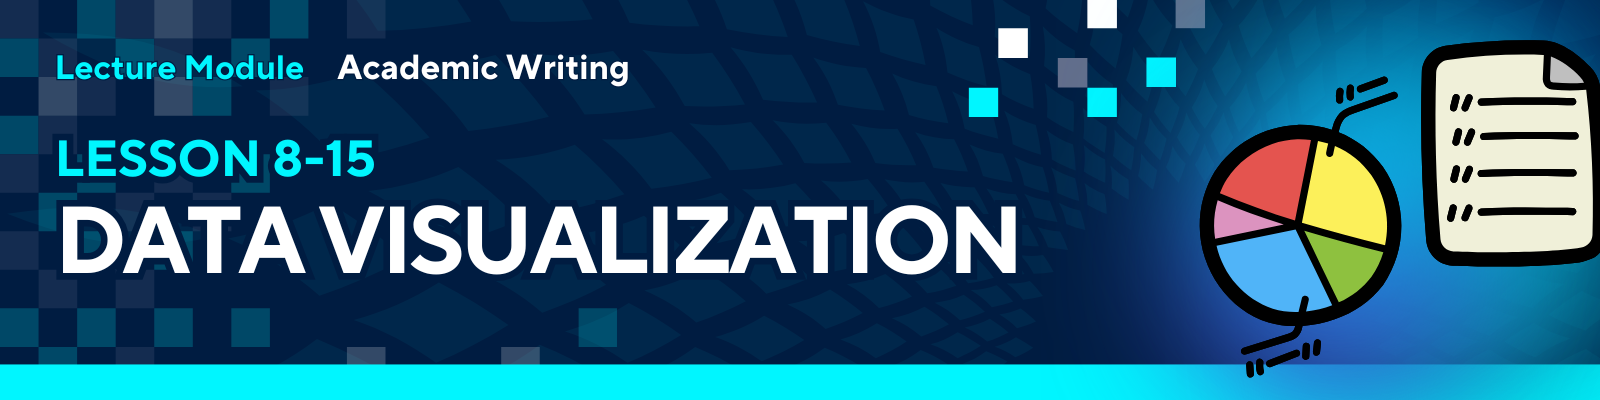

**Settings and Packages Preparation**<br>< <font color="red">**!**</font> > Run the following code whenever you open this workbook

In [59]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from urllib.request import urlretrieve
plt.rcParams['figure.dpi'] = 300

def load_dataset(url, filename): return pd.read_csv(filename, low_memory=False) if os.path.exists(filename) else pd.read_csv(url, low_memory=False).to_csv(filename, index=False) or pd.read_csv(filename, low_memory=False)

# If error, uncomment this:
#life_expectancy = load_dataset("https://www.dropbox.com/scl/fi/8vwam1u436lxn3d6qnf62/life_expectancy.csv?rlkey=aj5r2a8n44jo9swhcnuoo7fd5&st=r58zl09e&dl=0&raw=1", "life_expectancy.csv")
#city_temperature = load_dataset("https://www.dropbox.com/scl/fi/s4y96dto8d9vu20ao5du5/city_temperature.csv?rlkey=ppohfggy8i8v329y1dg9ub5p6&st=fuf9bpzy&dl=0&raw=1", "city_temperature.csv")

life_expectancy = load_dataset("https://www.dropbox.com/s/jr72bb2bpcxo725/life_expectancy.csv?raw=1", "../life_expectancy.csv")
city_temperature = load_dataset("https://www.dropbox.com/s/d56yws7bkn3eeam/city_temperature.csv?raw=1", "../city_temperature.csv")

UGLY, BAD, WRONG = "\033[33m╔\033[0m 😖 \033[33;1mUGLY!\033[0m \033[33m═══════════════════════════════\033[0m", "\033[35m╔\033[0m 👎 \033[35;1mBAD!\033[0m \033[35m═══════════════════════════════\033[0m", "\033[31m╔\033[0m ❌ \033[31;1mWRONG!\033[0m \033[31m═══════════════════════════════\033[0m"



---



# **Lesson** <font color="#B0AD89"><strong>5 ⫶⫶ </strong></font>Visualizing Uncertainty

<img src="https://i.imgur.com/uwgsruz.png" width=1024 />

<img src="https://i.imgur.com/LN48EI9.png" width=1024 />



## <font color="#B0AD89"><strong>5.1 ⫶ </strong></font>Expressing probabilities in terms of frequencies

<img src="https://i.imgur.com/RKUFIOJ.png" width=1024 />

### <font color="#B0AD89"><strong>a ⬝ </strong></font>Discrete outcome visualization

<img src="https://i.imgur.com/AEuLWzM.png" width=1024 />

<img src="https://i.imgur.com/S1ClYQu.png" width=1024 />

In [60]:
# Filter for Africa region in 2010 and select specific columns
sample_africa = life_expectancy[
    (life_expectancy['Region'] == 'Africa') &
    (life_expectancy['Year'] == 2010)
][['Region', 'Schooling']]

# Count countries with schooling <= 6 years
print("Number of Countries with Schooling < 6:",
      len(sample_africa[sample_africa['Schooling'] <= 6]))

# Display the filtered dataframe
sample_africa.head(12)

Number of Countries with Schooling < 6: 36


,Region,Schooling
86,Africa,2.6
89,Africa,6.2
230,Africa,6.7
379,Africa,2.3
386,Africa,4.2
497,Africa,8.2
578,Africa,2.1
596,Africa,5.1
617,Africa,2.4
631,Africa,3.2


In [61]:
# Set random seed
np.random.seed(123)

# Create simple grid points
points = [(x, y) for x in range(1, 10) for y in range(1, 7)]
ratio = 1 - 36/54 # We assume there are 54 African countries

# Create dataframe directly
data = pd.DataFrame(points, columns=['x', 'y'])
data['ratio'] = ratio
data['value'] = np.random.choice(
    ['S', 'F'],
    size=len(data),
    p=[ratio, 1-ratio]
)

data.head(12)

,x,y,ratio,value
0,1,1,0.333333,F
1,1,2,0.333333,S
2,1,3,0.333333,S
3,1,4,0.333333,F
4,1,5,0.333333,F
5,1,6,0.333333,F
6,2,1,0.333333,F
7,2,2,0.333333,F
8,2,3,0.333333,F
9,2,4,0.333333,F


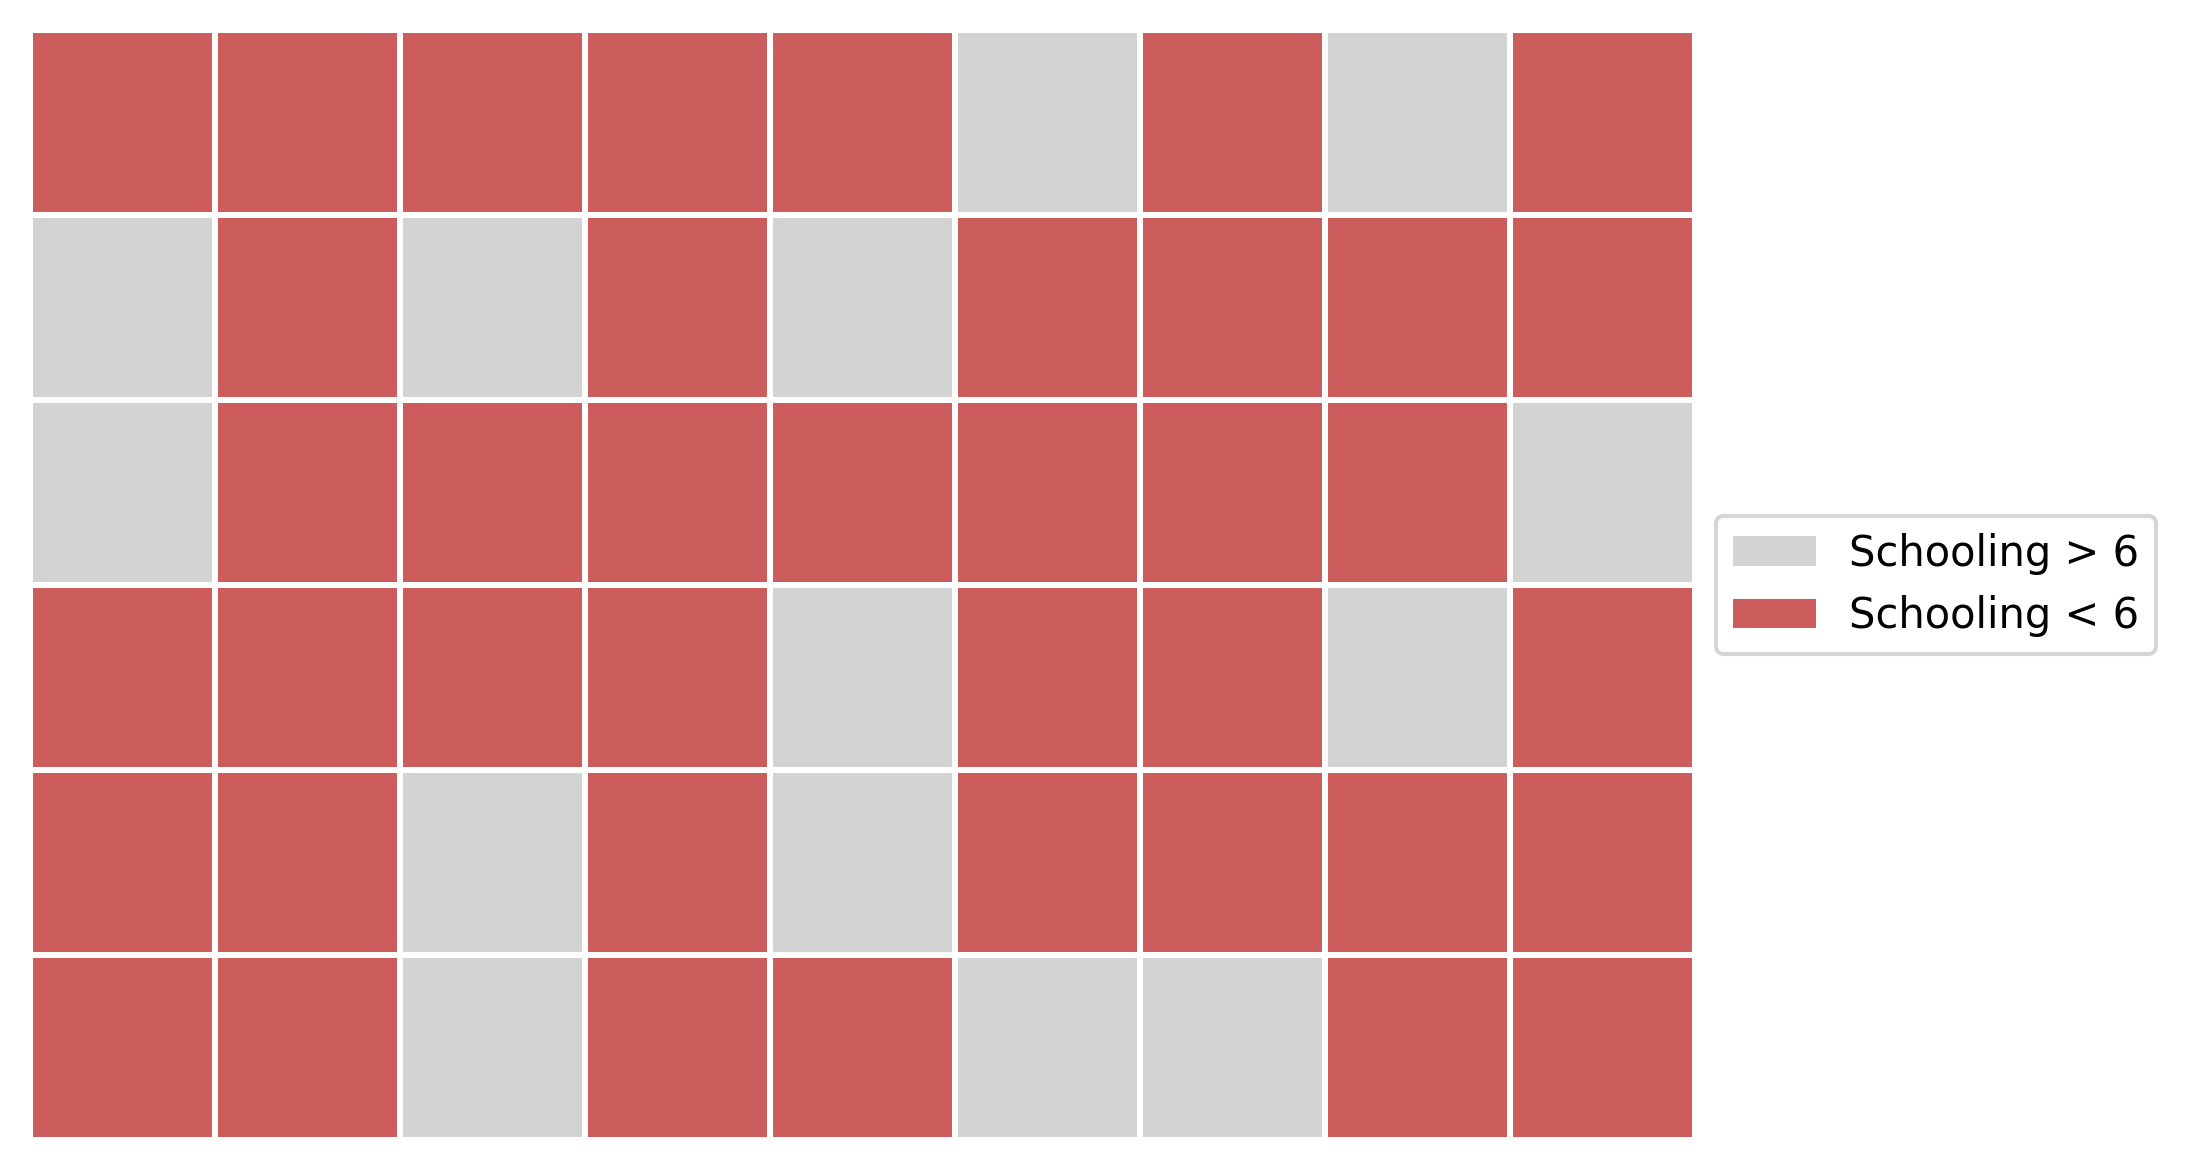

In [62]:
# Set figure size
plt.figure(figsize=(10, 4))

# Create heatmap using seaborn
sns.heatmap(
    data.pivot(index='y', columns='x', values='value').eq('S'),  # Pivot and convert to boolean
    cmap=['indianred', 'lightgrey'],  # Colors for F and S respectively
    cbar=False,  # Remove colorbar
    square=True,  # Make cells square
    linewidths=1,  # Add white lines between tiles
    linecolor='white',  # Set line color
    xticklabels=False,  # Remove x-axis labels
    yticklabels=False  # Remove y-axis labels
)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='lightgrey', label='Schooling > 6'),
    Patch(facecolor='indianred', label='Schooling < 6')
]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

# Remove x and y axis titles
plt.xlabel('')
plt.ylabel('')

# Remove padding
plt.tight_layout()

# Show plot
plt.show()

### <font color="#B0AD89"><strong>b ⬝ </strong></font>Quantile dotplot

<img src="https://i.imgur.com/iP4vxGa.png" width=1024 />

<img src="https://i.imgur.com/hJCFTTs.png" width=1024 />

In [63]:
sample_africa_bool = sample_africa.copy()

# Add new column with conditional values
sample_africa_bool['value'] = np.where(sample_africa_bool['Schooling'] >= 6, 'S', 'F')

sample_africa_bool.head(12)

,Region,Schooling,value
86,Africa,2.6,F
89,Africa,6.2,S
230,Africa,6.7,S
379,Africa,2.3,F
386,Africa,4.2,F
497,Africa,8.2,S
578,Africa,2.1,F
596,Africa,5.1,F
617,Africa,2.4,F
631,Africa,3.2,F


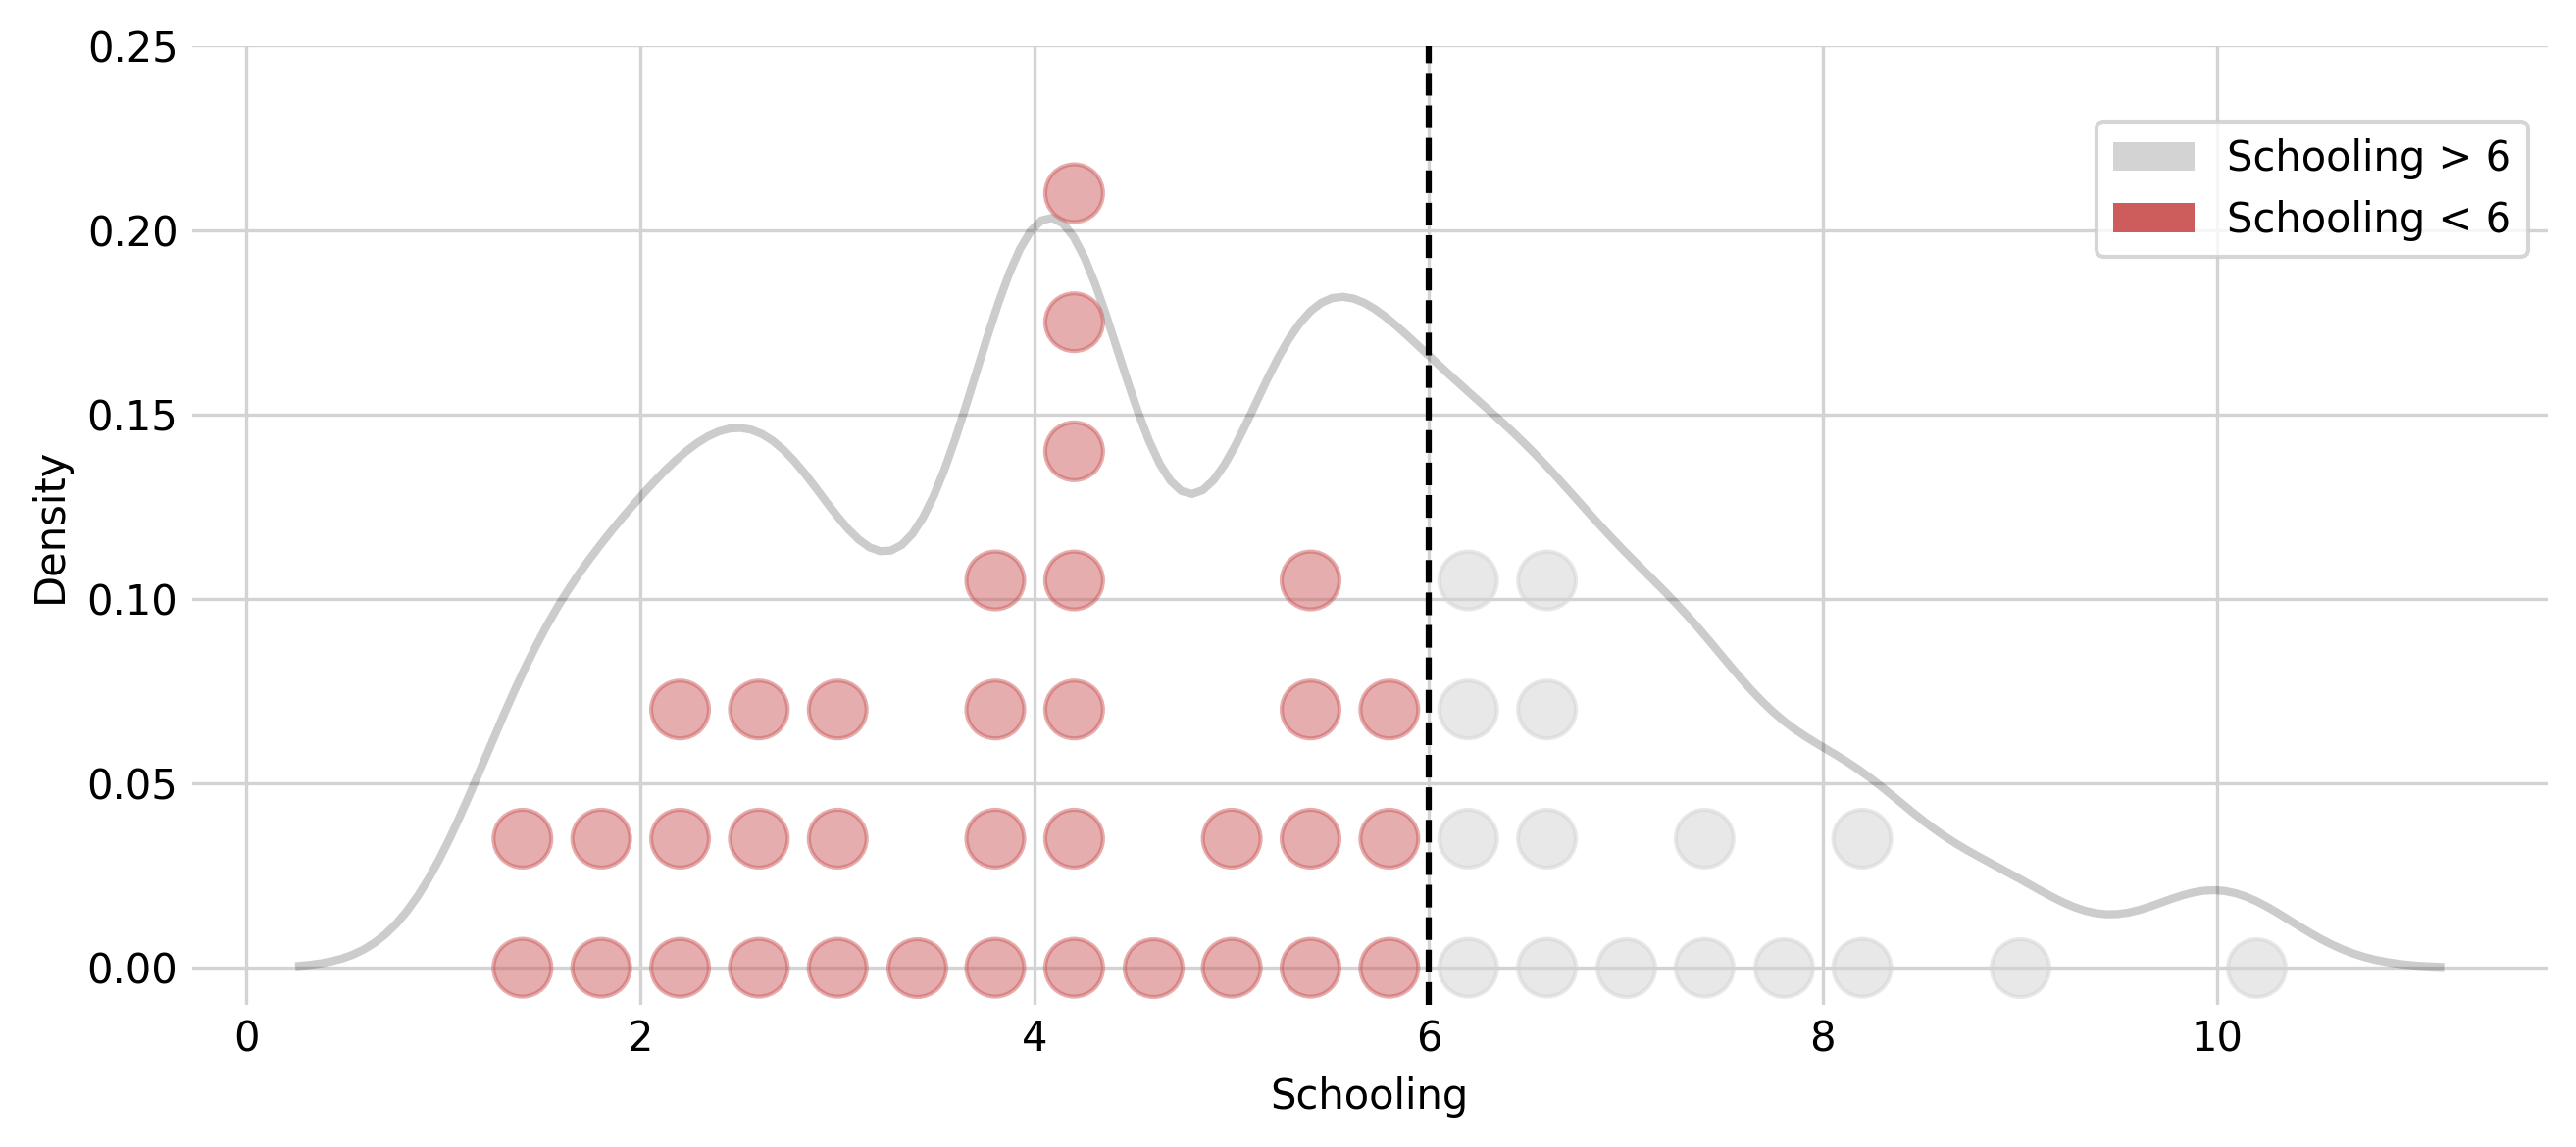

In [64]:
plt.figure(figsize=(9, 4))

# Create KDE plot
sns.kdeplot(data=sample_africa_bool, x='Schooling', color='black', alpha=0.2,
            bw_adjust=0.4, linewidth=2)

# Dot plot
for x in np.arange(0, 16, 0.4):  # Assuming schooling years range from 0-16
    data_in_bin = sample_africa_bool[(sample_africa_bool['Schooling'] >= round(x, 2)) & (sample_africa_bool['Schooling'] < round(x + 0.4, 2))]
    plt.scatter([x + 0.2] * len(data_in_bin),
               np.arange(len(data_in_bin)) * 0.035,  # Stack height
               c=['lightgrey' if v == 'S' else 'indianred' for v in data_in_bin['value']],
               s=200, zorder=3, alpha=0.5)

# Styling
plt.axvline(x=6, color='black', linestyle='--', zorder=2)
plt.ylim(-0.01, 0.25)
plt.legend(handles=[Patch(facecolor='lightgrey', label='Schooling > 6'),
                   Patch(facecolor='indianred', label='Schooling < 6')],
          loc='center left', bbox_to_anchor=(0.8, 0.85))
plt.grid(color='lightgrey', linestyle='-', zorder=1)
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/qM1O0Bd.png" width=1024 />

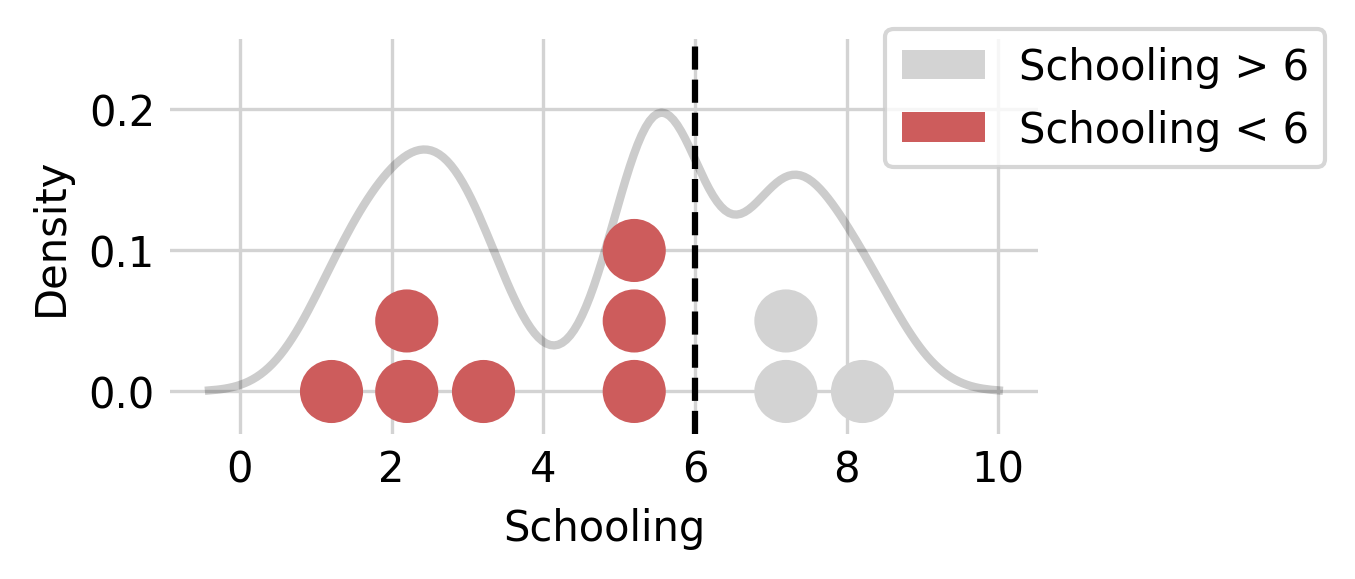

In [65]:
plt.figure(figsize=(4.5, 2))
sample_africa10 = sample_africa_bool.sample(n=10, random_state=43)

# Create KDE plot
sns.kdeplot(data=sample_africa10, x='Schooling', color='black', alpha=0.2,
            bw_adjust=0.4, linewidth=2)

# Dot plot
for x in np.arange(0, 16, 1):  # Assuming schooling years range from 0-16
    data_in_bin = sample_africa10[(sample_africa10['Schooling'] >= x) & (sample_africa10['Schooling'] < x + 1)]
    plt.scatter([x + 0.2] * len(data_in_bin),
               np.arange(len(data_in_bin)) * 0.05,  # Stack height
               c=['lightgrey' if v == 'S' else 'indianred' for v in data_in_bin['value']],
               s=200, zorder=3)

# Styling
plt.axvline(x=6, color='black', linestyle='--', zorder=2)
plt.ylim(-0.03, 0.25)
plt.legend(handles=[Patch(facecolor='lightgrey', label='Schooling > 6'),
                   Patch(facecolor='indianred', label='Schooling < 6')],
          loc='center left', bbox_to_anchor=(0.8, 0.85))
plt.grid(color='lightgrey', linestyle='-', zorder=1)
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()

## <font color="#B0AD89"><strong>  Practice 5.1 ᆢ</strong></font>ᆢ
**Issue: What is the probability of a country in Europe has a mean Schooling more than completion of High School (12 years)**

Make a 7 x 6 colored box to represent the probabily that a European country has a mean level of Schooling more than 12. Color it `dodgerblue` and the rest `aliceblue`.


In [66]:
# Filter and process European data
sample_eu = life_expectancy[
    (life_expectancy['Region'].isin(['European Union', 'Rest of Europe'])) &
    (life_expectancy['Year'] == 2010)
][['Region', 'Schooling']].copy()

# Add value column based on schooling threshold
sample_eu['value'] = np.where(sample_eu['Schooling'] >= 12, 'S', 'F')

# Print results
print(f"\nNumber of Countries in Europe: {len(sample_eu)}")
print(f"Number of Countries with Schooling > 12: {len(sample_eu[sample_eu['Schooling'] >= 12])}")
sample_eu.head(12)


Number of Countries in Europe: 42
Number of Countries with Schooling > 12: 16


,Region,Schooling,value
31,Rest of Europe,13.3,S
35,European Union,13.8,S
46,European Union,12.3,S
52,Rest of Europe,12.7,S
118,European Union,12.1,S
157,Rest of Europe,10.4,F
417,European Union,10.8,F
429,European Union,12.2,S
452,European Union,12.2,S
583,European Union,11.5,F


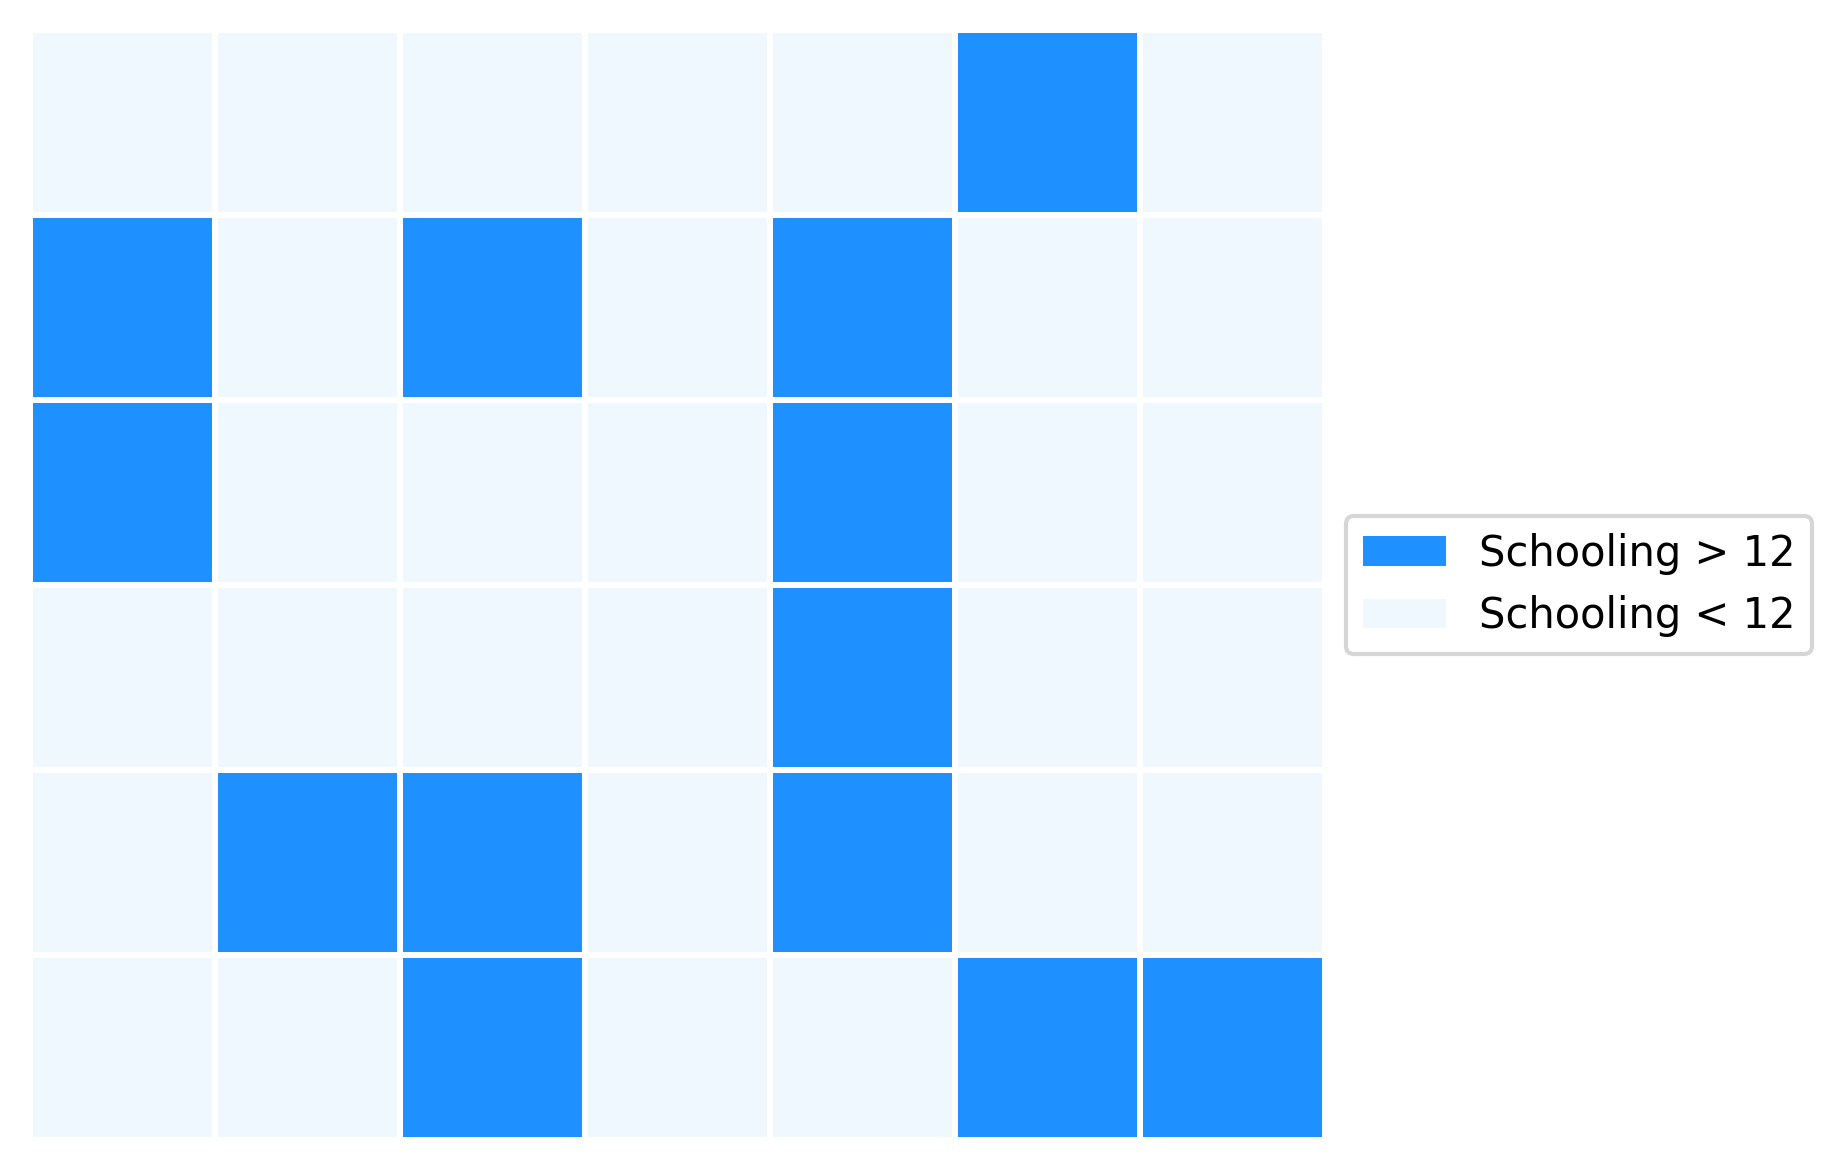

In [67]:
# Set random seed for reproducibility
np.random.seed(123)

# Create simple grid points
points = [(x, y) for x in range(1, 8) for y in range(1, 7)]
ratio = 16/42 # We assume there are 54 African countries

# Create dataframe directly
data = pd.DataFrame(points, columns=['x', 'y'])
data['ratio'] = ratio
data['value'] = np.random.choice(
    ['S', 'F'],
    size=len(data),
    p=[ratio, 1-ratio]
)

# Set figure size
plt.figure(figsize=(10, 4))

# Create heatmap using seaborn
sns.heatmap(
    data.pivot(index='y', columns='x', values='value').eq('S'),  # Pivot and convert to boolean
    cmap=['aliceblue', 'dodgerblue'],  # Colors for F and S respectively
    cbar=False,  # Remove colorbar
    square=True,  # Make cells square
    linewidths=1,  # Add white lines between tiles
    linecolor='white',  # Set line color
    xticklabels=False,  # Remove x-axis labels
    yticklabels=False  # Remove y-axis labels
)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='dodgerblue', label='Schooling > 12'),
    Patch(facecolor='aliceblue', label='Schooling < 12')
]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

# Remove x and y axis titles
plt.xlabel('')
plt.ylabel('')

# Remove padding
plt.tight_layout()

# Show plot
plt.show()


## <font color="#B0AD89"><strong>5.2 ⫶ </strong></font>Statistical Sampling

<img src="https://i.imgur.com/KoOdsu0.png" width=1024 />

<img src="https://i.imgur.com/W06hImO.png" width=1024 />

### <font color="#B0AD89"><strong>a ⬝ </strong></font>Population, Sample, Parameter

<img src="https://i.imgur.com/hkYbcGQ.png" width=1024 />

<img src="https://i.imgur.com/e5xmiSO.png" width=1024 />

<img src="https://i.imgur.com/opekKKQ.png" width=1024 />

<img src="https://i.imgur.com/v4yQ8s7.png" width=1024 />

In [68]:
# Set random seed for reproducibility
np.random.seed(123)

# Filter African data and sample 10 rows
random_sample_africa = life_expectancy[
    (life_expectancy['Region'] == 'Africa') &
    (life_expectancy['Year'] == 2000)
][['Region', 'Life_expectancy']].sample(n=10).reset_index(drop=True)

random_sample_africa

,Region,Life_expectancy
0,Africa,55.4
1,Africa,57.8
2,Africa,72.8
3,Africa,47.7
4,Africa,49.1
5,Africa,47.5
6,Africa,70.9
7,Africa,50.0
8,Africa,46.3
9,Africa,68.7


<font size=2 color="grey">
Population: This is all the 54 African countries. We want to learn something about life expectancy across all of these countries.<br>
Sample: Let's say we only have data for 10 of the 54 African countries. Those 10 countries represent our sample.<br>
Parameters: These are details about the whole population (all 54 countries) we want to know but can't directly measure. It could be the average life expectancy or the range of life expectancies across all of Africa.<br>
Statistical Sampling: This is like trying to guess the average life expectancy in all of Africa by only looking at some of the countries.<br>

### <font color="#B0AD89"><strong>b ⬝ </strong></font>Estimates, Standard Deviation, Standard Error

<img src="https://i.imgur.com/eDOAbOf.png" width=1024 />

<img src="https://i.imgur.com/fG76p11.png" width=1024 />

<img src="https://i.imgur.com/d04hxcH.png" width=1024 />

<img src="https://i.imgur.com/kICv4ah.png" width=1024 />


In [69]:
# Calculate summary statistics
summary_data = pd.DataFrame({
    'Region': random_sample_africa['Region'].iloc[0],  # Just take first value since they're all 'Africa'
    'Mean': random_sample_africa['Life_expectancy'].mean(),
    'SE': random_sample_africa['Life_expectancy'].std() / np.sqrt(len(random_sample_africa))
}, index=[0])

summary_data

,Region,Mean,SE
0,Africa,56.62,3.306788


<font size=2 color="grey">
Estimates: These are our best guesses of the parameters based on the sample (the 10 countries) we have. Here, we estimate that the life expectancy across all 54 countries is 55.2 ± 2.4.<br>
Point Estimates: These are specific guesses for a parameter, like guessing the average life expectancy for all African countries is 60 years, based on our sample. Here, we guesses 55.2.<br>
Standard Error: This tells us how good our guess of the average life expectancy is likely to be. Here, the standard error is 2.40.

## <font color="#B0AD89"><strong>  Practice 5.2 ᆢ</strong></font>ᆢᆢ
Pick 20 countries in Asia (`Region = "Asia"`) and calculate the BMI mean and standard error. Use "Year == 2010".

In [70]:
# Set random seed for reproducibility
np.random.seed(123)

# Filter Asia data and sample 20 rows
random_asia_sample = life_expectancy[
    (life_expectancy['Region'] == 'Asia') &
    (life_expectancy['Year'] == 2010)
][['Region', 'Life_expectancy']].sample(n=20).reset_index(drop=True)

random_asia_sample

,Region,Life_expectancy
0,Asia,65.3
1,Asia,74.4
2,Asia,67.4
3,Asia,74.2
4,Asia,75.9
5,Asia,69.3
6,Asia,67.6
7,Asia,66.6
8,Asia,70.9
9,Asia,74.8


In [71]:
pd.DataFrame({
    'Region': random_asia_sample['Region'].iloc[0],  # Just take first value since they're all 'Africa'
    'Mean': random_asia_sample['Life_expectancy'].mean(),
    'SE': random_asia_sample['Life_expectancy'].std() / np.sqrt(len(random_asia_sample))
}, index=[0])

,Region,Mean,SE
0,Asia,71.495,1.17461


## <font color="#B0AD89"><strong>5.3 ⫶ </strong></font>Uncertainty of Point Estimates

<img src="https://i.imgur.com/19cIzOB.png" width=1024 />


### <font color="#B0AD89"><strong>a ⬝ </strong></font>Error bars

<img src="https://i.imgur.com/PtUnK1Z.png" width=1024 />

<img src="https://i.imgur.com/3HguJ3w.png" width=1024 />

<img src="https://i.imgur.com/H3bzMwq.png" width=1024 />

<img src="https://i.imgur.com/NrJkQ7G.png" width=1024 />



In [72]:
# Calculate statistics
stats_dict = {
    'Region': 'Africa',
    'Mean': random_sample_africa['Life_expectancy'].mean(),
    'Standard_deviation': random_sample_africa['Life_expectancy'].std(),
    'Standard_error': random_sample_africa['Life_expectancy'].std() / np.sqrt(len(random_sample_africa)),
}

# Add confidence intervals
stats_dict['Confidence_interval_80'] = stats_dict['Standard_error'] * stats.norm.ppf(0.9)
stats_dict['Confidence_interval_95'] = stats_dict['Standard_error'] * stats.norm.ppf(0.975)
stats_dict['Confidence_interval_99'] = stats_dict['Standard_error'] * stats.norm.ppf(0.995)

# Create DataFrame and reshape
intervals = pd.DataFrame([stats_dict])
intervals = pd.melt(intervals,
                   id_vars=['Region', 'Mean'],
                   var_name='Interval',
                   value_name='Value')

# Convert Interval to category type
intervals['Interval'] = intervals['Interval'].astype('category')

intervals

,Region,Mean,Interval,Value
0,Africa,56.62,Standard_deviation,10.456981
1,Africa,56.62,Standard_error,3.306788
2,Africa,56.62,Confidence_interval_80,4.237819
3,Africa,56.62,Confidence_interval_95,6.481185
4,Africa,56.62,Confidence_interval_99,8.517720


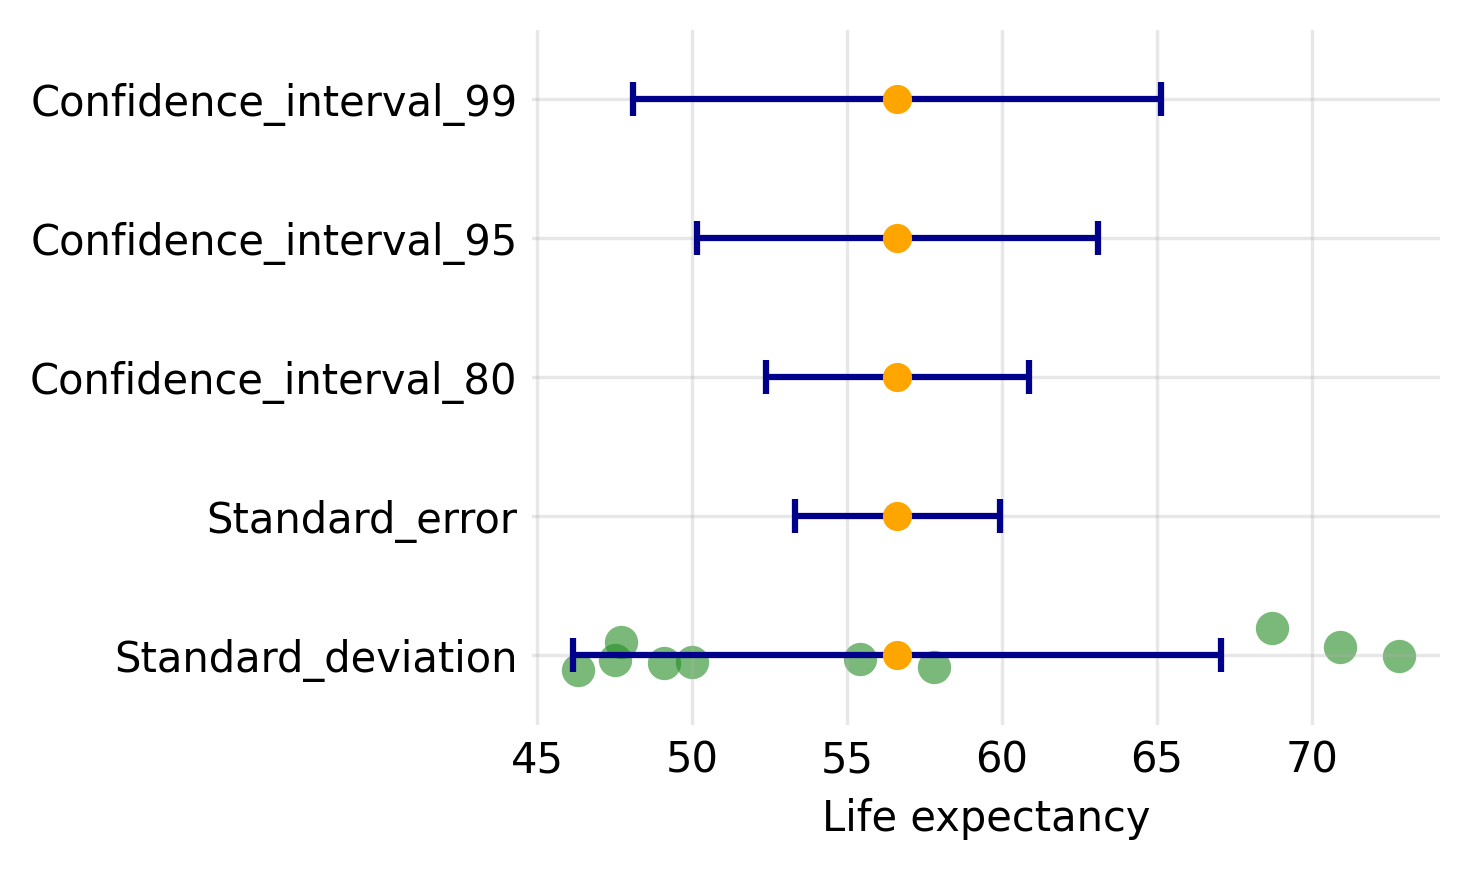

In [73]:
plt.figure(figsize=(5, 3))

# Create a DataFrame for samples
samples = random_sample_africa.copy()
samples['Interval'] = 'All Samples'

# Plot error bars using plt.errorbar
for idx, row in intervals.iterrows():
    # Plot errorbar with caps
    plt.errorbar(x=row['Mean'],
                 y=idx,
                 xerr=row['Value'],
                 fmt='o',
                 color='orange',
                 ecolor='darkblue',
                 elinewidth=1.5,
                 capsize=4,
                 capthick=1.5,
                 zorder=2)

# Add individual points with jitter
sns.stripplot(data=samples, x='Life_expectancy', y='Interval',
              color='forestgreen', size=8, jitter=0.2,
              alpha=0.6, zorder=1)

# Styling
plt.xlabel('Life expectancy')
plt.ylabel('')
plt.ylim(-0.5,4.5)

plt.yticks(range(len(intervals)), intervals['Interval'])  # Set custom y-axis labels
plt.grid(True, alpha=0.3)
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()

### <font color="#B0AD89"><strong>b ⬝ </strong></font>Graded error bars

<img src="https://i.imgur.com/Wa8GhYJ.png" width=1024 />

<img src="https://i.imgur.com/WCyoiF6.png" width=1024 />


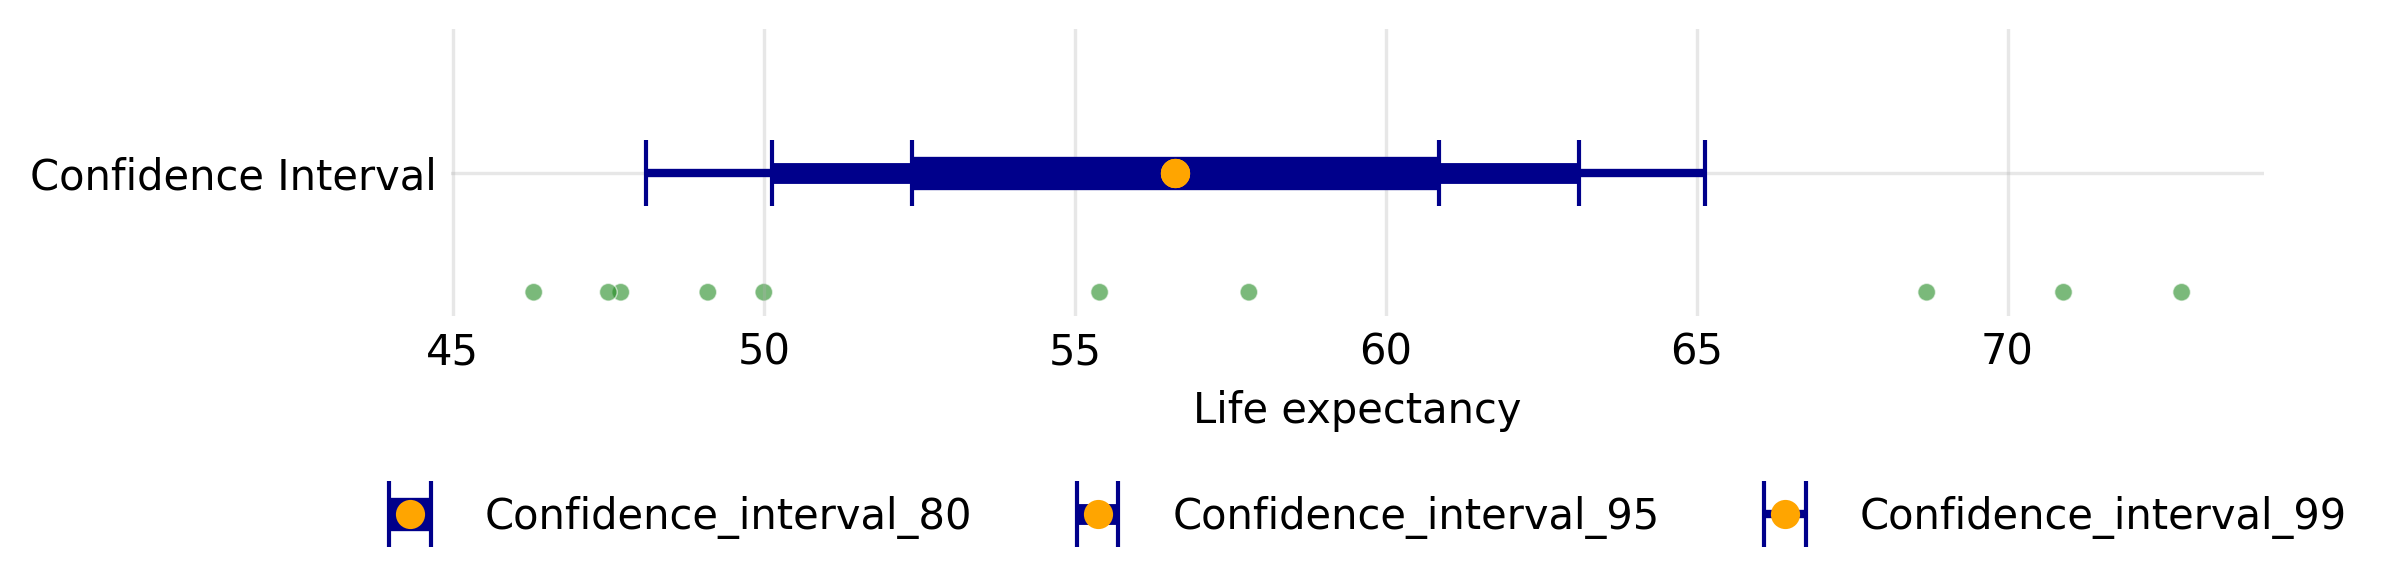

In [74]:
plt.figure(figsize=(8, 3))

# Filter intervals to include only the specified ones
filtered_intervals = intervals[intervals['Interval'].isin([
    'Confidence_interval_80',
    'Confidence_interval_95',
    'Confidence_interval_99'
])]

# Define line widths for the specified intervals
line_widths = {
    'Confidence_interval_80': 8,
    'Confidence_interval_95': 5,
    'Confidence_interval_99': 2
}

# Plot error bars using plt.errorbar
for idx, row in filtered_intervals.iterrows():
    # Get the line width based on the interval type
    line_width = line_widths.get(row['Interval'], 1)  # Default to 1 if not found

    # Plot errorbar with caps
    plt.errorbar(x=row['Mean'], y='Confidence Interval',  # Fixed y-position for stacking
                 xerr=row['Value'],
                 fmt='o', color='orange', ecolor='darkblue',
                 elinewidth=line_width, capsize=8,
                 zorder=2, label=row['Interval'])  # Add label for legend

# Add individual points with jitter
sns.scatterplot(data=samples, x='Life_expectancy', y=-1,  # Fixed y-position for stacking
              color='forestgreen', size=8,
              alpha=0.6, zorder=1, legend=None)

# Styling
plt.xlabel('Life expectancy')
plt.ylabel('')
plt.ylim(-1.2,1.2)

plt.grid(True, alpha=0.3)
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Add legend
plt.legend(bbox_to_anchor=(0.5, -0.7),
         loc='center',
         ncol=5,  # Display in 5 columns
         frameon=False)  # Remove legend border

plt.tight_layout()
plt.show()

### <font color="#B0AD89"><strong>c ⬝ </strong></font>Comparing Means & Significance


<img src="https://i.imgur.com/7vTJovY.png" width=1024 />


In [76]:
# Set random seed
np.random.seed(42)

# Create region mapping dictionary
region_map = {
    'European Union': 'Europe',
    'Rest of Europe': 'Europe',
    'North America': 'Americas',
    'Central America and Caribbean': 'Americas',
    'South America': 'Americas',
    'Middle East': 'Asia',
    'Asia': 'Asia'
}

# Process world data
sample_world = life_expectancy.copy()
# Map regions using a lambda function
sample_world['Region'] = sample_world['Region'].map(lambda x: region_map.get(x, x))

# Filter for year 2000 and sample 10 from each region
sample_world = (sample_world[sample_world['Year'] == 2000]
               .groupby('Region')
               .apply(lambda x: x.sample(n=10, replace=True))
               .reset_index(drop=True))

# Calculate statistics by region
intervals_BMI = []
for region in sample_world['Region'].unique():
    region_data = sample_world[sample_world['Region'] == region]
    mean_bmi = region_data['BMI'].mean()
    se = region_data['BMI'].std() / np.sqrt(len(region_data))

    stats_dict = {
        'Region': region,
        'Mean': mean_bmi,
        'Standard_error': se,
        'Confidence_interval_80': stats.norm.ppf(0.9) * se,
        'Confidence_interval_95': stats.norm.ppf(0.975) * se,
        'Confidence_interval_99': stats.norm.ppf(0.995) * se
    }
    intervals_BMI.append(stats_dict)

# Create DataFrame and reshape
intervals_BMI = pd.DataFrame(intervals_BMI)
intervals_BMI = pd.melt(intervals_BMI,
                       id_vars=['Region', 'Mean', 'Standard_error'],
                       var_name='Interval',
                       value_name='Value')

# Convert Interval to category
intervals_BMI['Interval'] = intervals_BMI['Interval'].astype('category')

intervals_BMI

/tmp/ipykernel_9223/100887652.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=10, replace=True))


,Region,Mean,Standard_error,Interval,Value
0,Africa,22.34,0.448999,Confidence_interval_80,0.575415
1,Americas,25.41,0.282627,Confidence_interval_80,0.362201
2,Asia,25.28,0.681306,Confidence_interval_80,0.873129
3,Europe,25.49,0.108985,Confidence_interval_80,0.139670
4,Oceania,27.73,0.738474,Confidence_interval_80,0.946393
5,Africa,22.34,0.448999,Confidence_interval_95,0.880022
6,Americas,25.41,0.282627,Confidence_interval_95,0.553938
7,Asia,25.28,0.681306,Confidence_interval_95,1.335335
8,Europe,25.49,0.108985,Confidence_interval_95,0.213607
9,Oceania,27.73,0.738474,Confidence_interval_95,1.447383


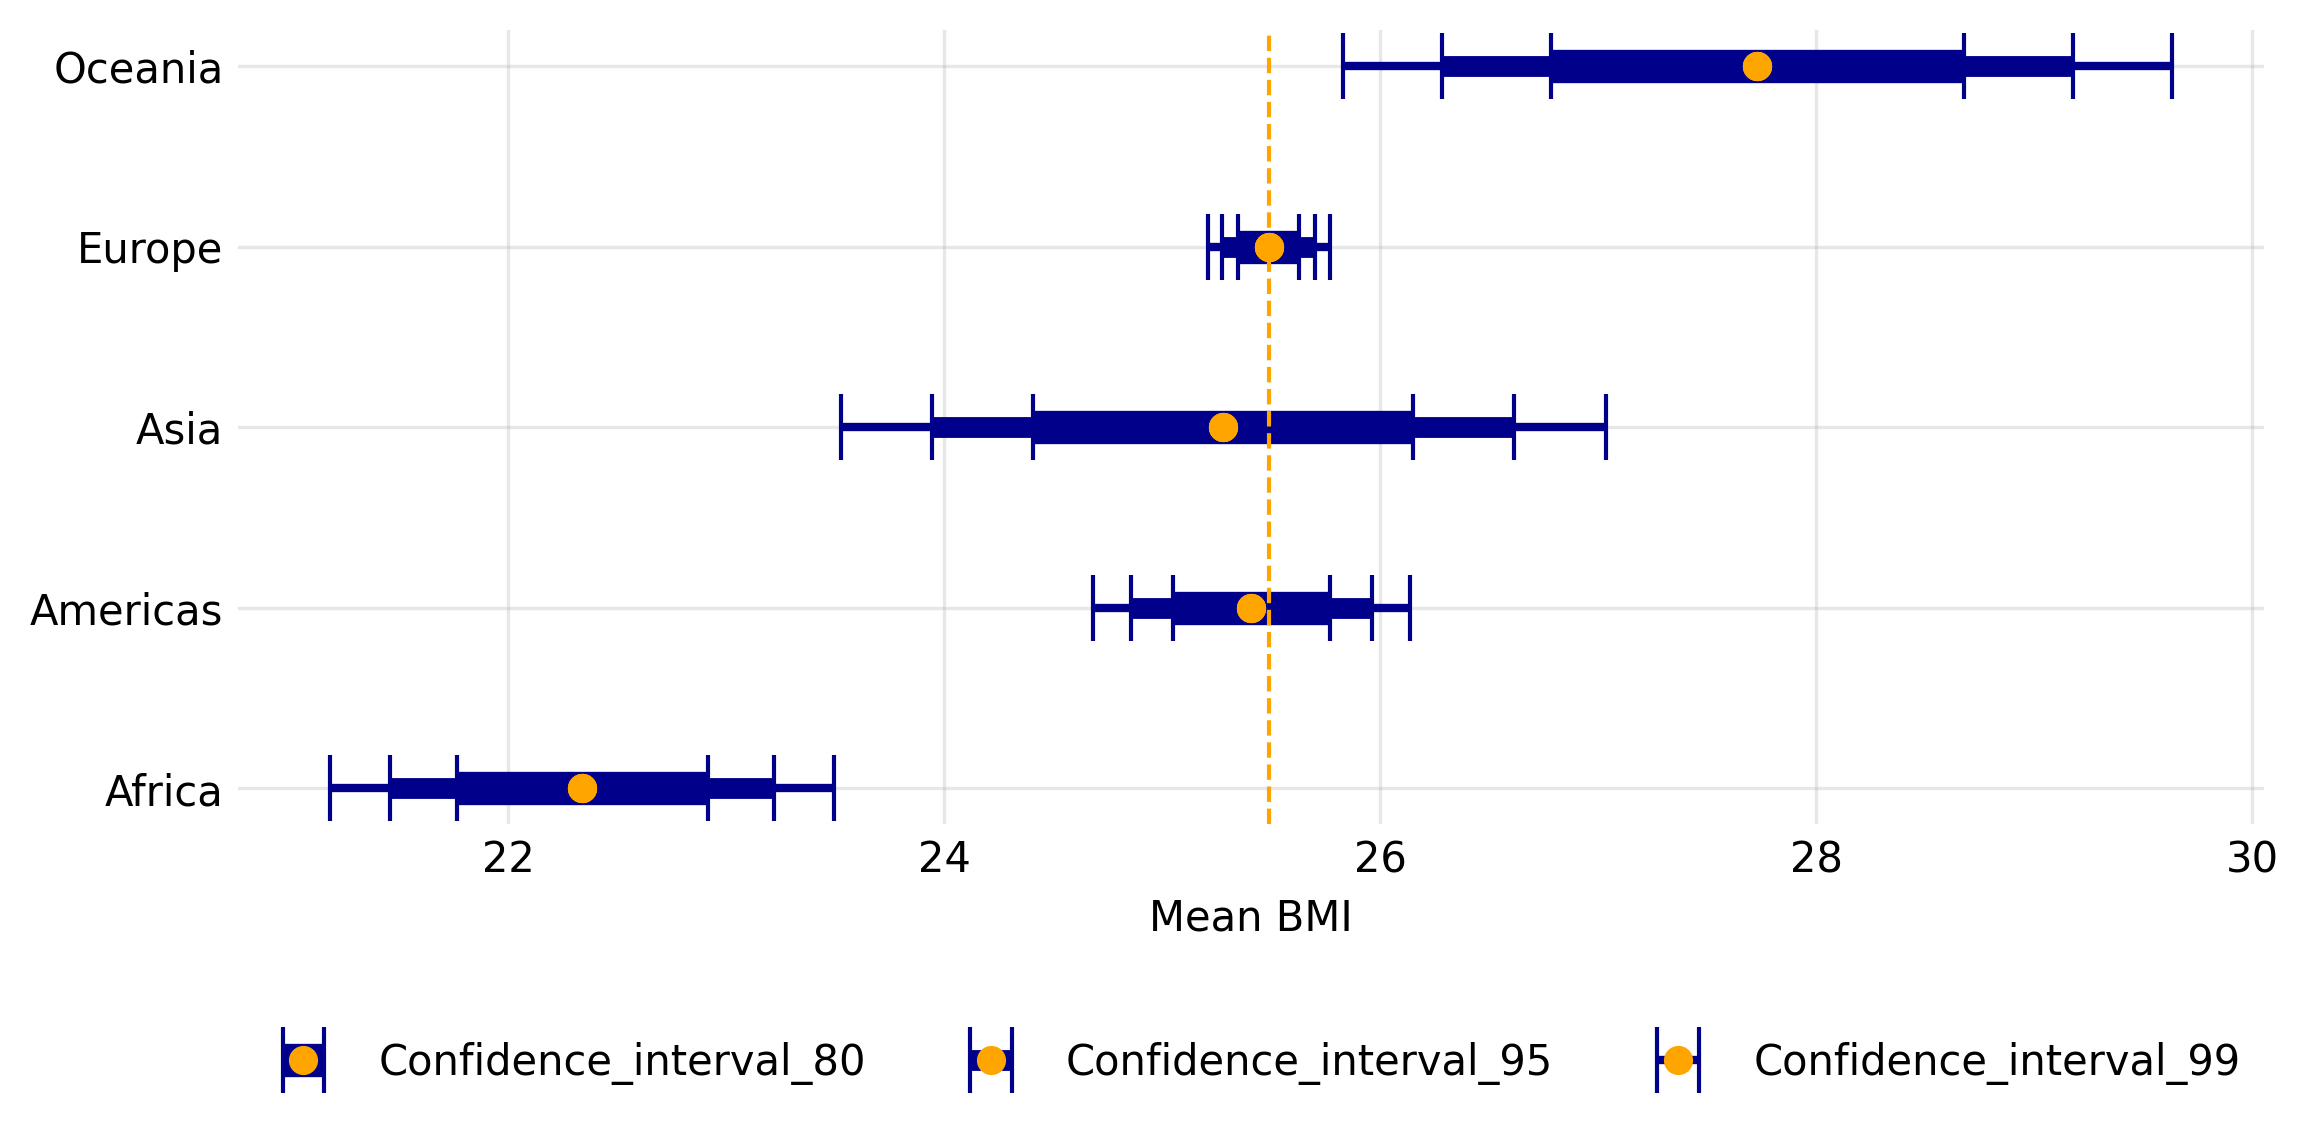

In [79]:
plt.figure(figsize=(8, 4))  # Adjust figure size for better visibility

# Plot error bars using plt.errorbar
for region in intervals_BMI['Region'].unique():
    region_data = intervals_BMI[intervals_BMI['Region'] == region]
    y_position = list(intervals_BMI['Region'].unique()).index(region)  # Get y-position based on region order

    for idx, row in region_data.iterrows():
      # Get the line width based on the interval type
      line_width = line_widths.get(row['Interval'], 1)  # Default to 1 if not found

      # Plot errorbar with caps
      plt.errorbar(x=row['Mean'], y=y_position,
                   xerr=row['Value'],
                   fmt='o', color='orange', ecolor='darkblue',
                   elinewidth=line_width, capsize=8,
                   zorder=2,
                   label=row['Interval'] if y_position == 0 else "")  # Add label only for first region

# Add a vertical dashed line for the mean BMI of Europe
plt.axvline(x=intervals_BMI[intervals_BMI['Region'] == 'Europe']['Mean'].iloc[0],
            color='orange',
            linestyle='--', linewidth=1)
# Styling
plt.xlabel('Mean BMI')
plt.ylabel('')

# Set y-axis ticks and labels based on regions
plt.yticks(range(len(intervals_BMI['Region'].unique())), intervals_BMI['Region'].unique())
plt.grid(True, alpha=0.3)
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Add legend
plt.legend(bbox_to_anchor=(0.5, -0.3),
         loc='center',
         ncol=3,  # Display in 5 columns
         frameon=False)  # Remove legend border

plt.tight_layout()
plt.show()



<img src="https://i.imgur.com/ZMiaqLh.png" width=1024 />


In [81]:
# Calculate the mean BMI of Europe
mean_bmi_europe = intervals_BMI[intervals_BMI['Region'] == 'Europe']['Mean'].iloc[0]

# Function to calculate confidence intervals for differences
def calculate_difference_ci(region_data, mean_bmi_europe, confidence_level):
    region_mean = region_data['Mean'].iloc[0]
    region_se = region_data['Standard_error'].iloc[0]
    europe_se = intervals_BMI[intervals_BMI['Region'] == 'Europe']['Standard_error'].iloc[0]

    # Calculate the difference
    difference = region_mean - mean_bmi_europe

    # Calculate the standard error of the difference
    se_difference = np.sqrt(region_se**2 + europe_se**2)

    # Calculate the critical value from the standard normal distribution
    critical_value = stats.norm.ppf(1 - (1 - confidence_level) / 2)

    # Calculate the margin of error
    margin_of_error = critical_value * se_difference

    # Calculate the confidence interval
    lower_bound = difference - margin_of_error
    upper_bound = difference + margin_of_error

    return difference, lower_bound, upper_bound

# Calculate differences and confidence intervals for each region
differences = []
for region in intervals_BMI['Region'].unique():
    if region != 'Europe':  # Skip Europe
        region_data = intervals_BMI[intervals_BMI['Region'] == region]

        # Calculate confidence intervals for 80%, 95%, and 99% levels
        for confidence_level, interval_name in zip([0.8, 0.95, 0.99], ['Confidence_interval_80', 'Confidence_interval_95', 'Confidence_interval_99']):
            difference, lower_bound, upper_bound = calculate_difference_ci(region_data, mean_bmi_europe, confidence_level)
            differences.append({
                'Region': region,
                'Interval': interval_name,
                'Difference': difference,
                'Lower_bound': lower_bound,
                'Upper_bound': upper_bound
            })

# Create a DataFrame for the differences
differences_df = pd.DataFrame(differences)

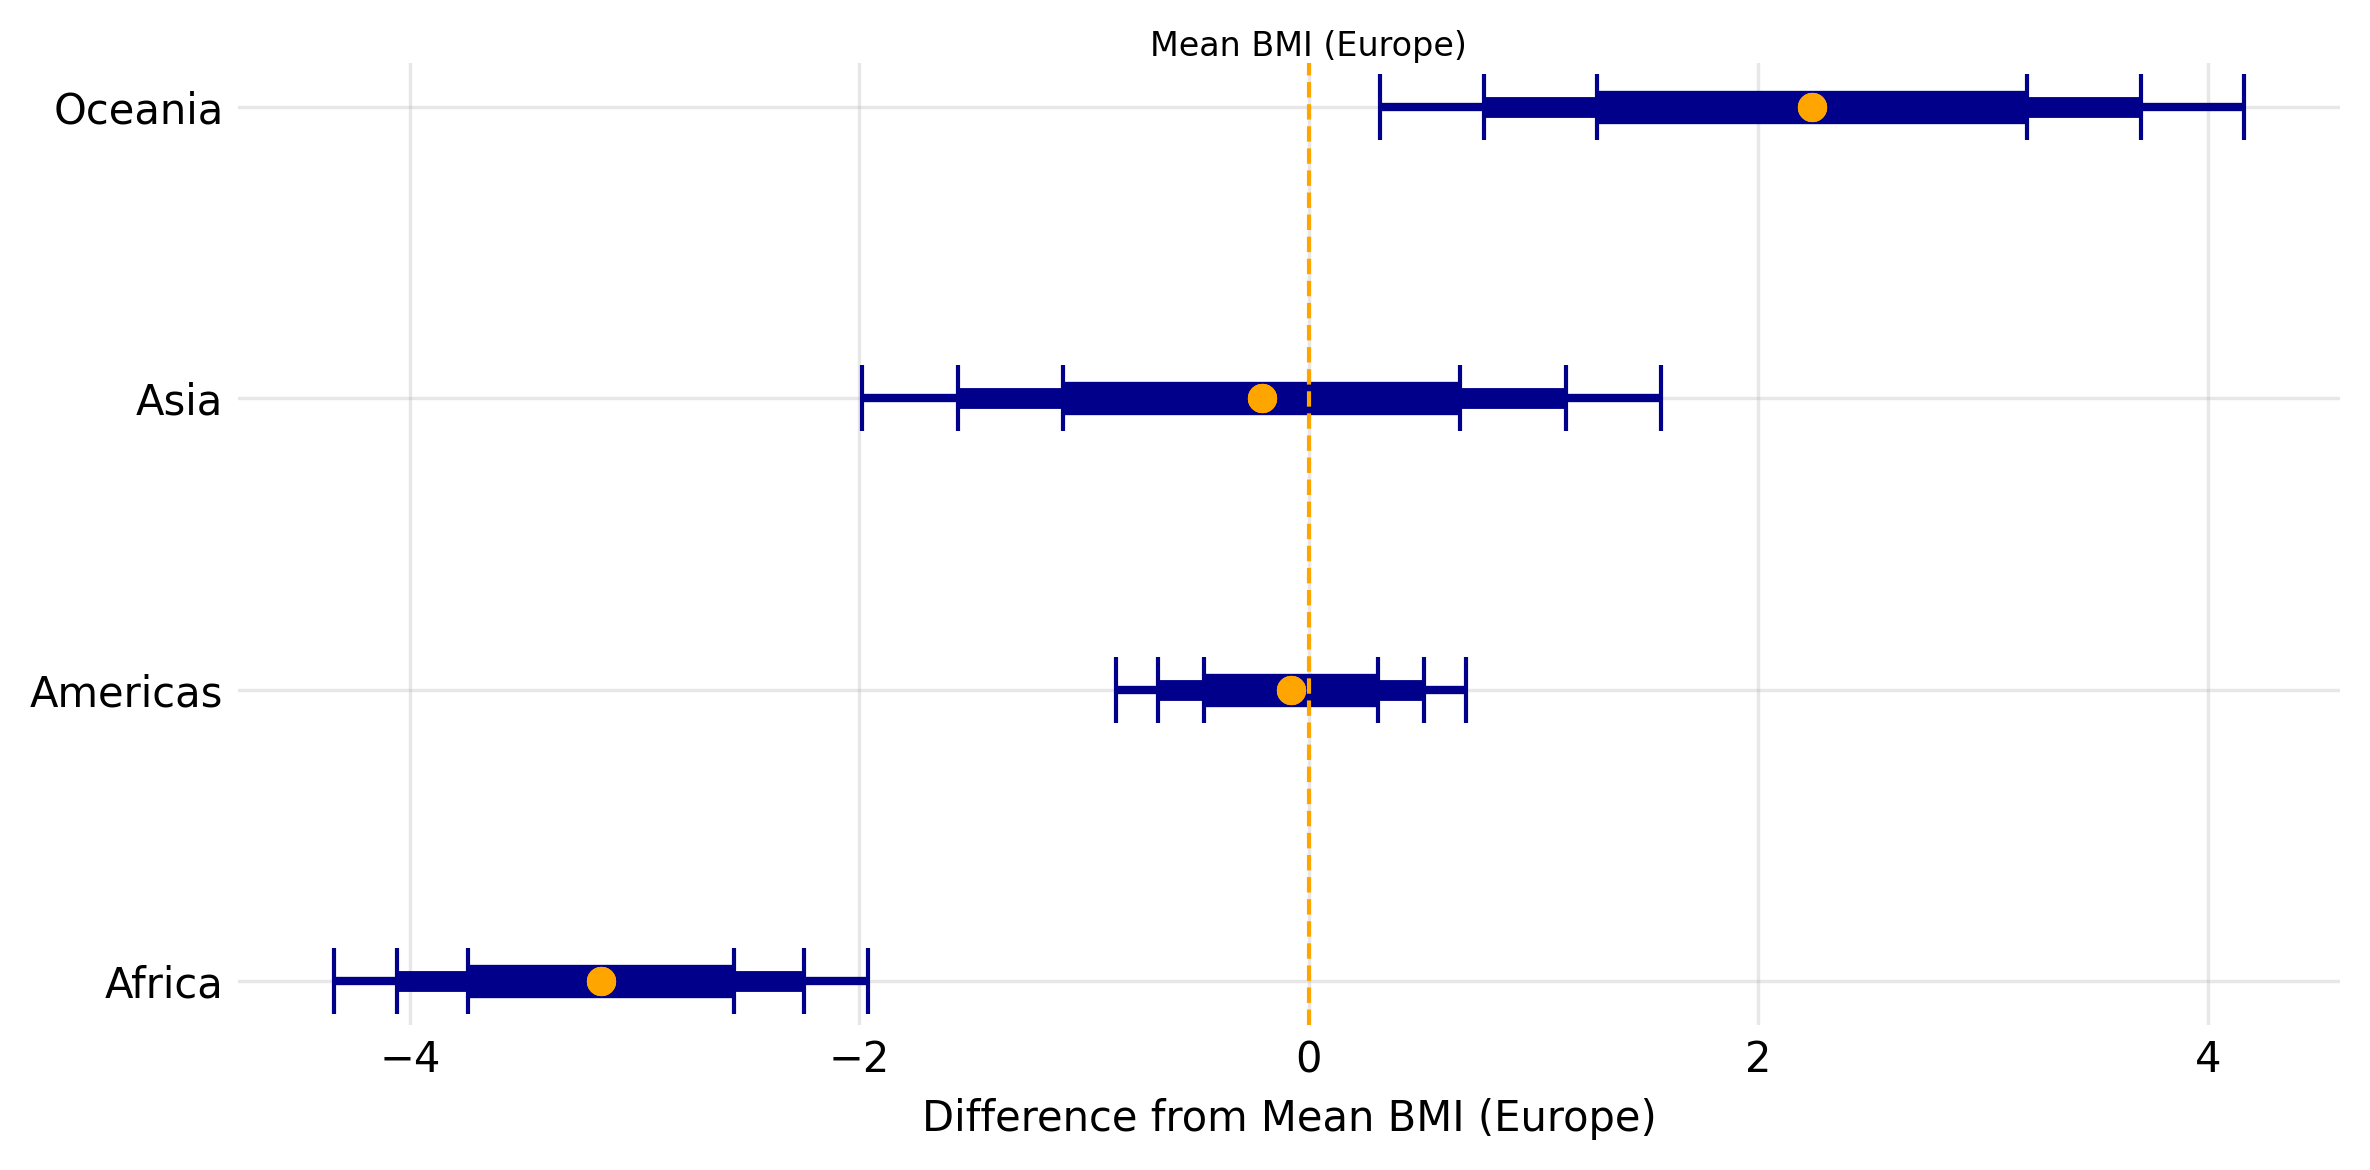

In [82]:
plt.figure(figsize=(8, 4))  # Adjust figure size for better visibility

# Plot error bars using plt.errorbar
for region in differences_df['Region'].unique():
    region_data = differences_df[differences_df['Region'] == region]
    y_position = list(differences_df['Region'].unique()).index(region)  # Get y-position based on region order

    for idx, row in region_data.iterrows():
        if row['Interval'] in line_widths:  # Only plot specified intervals
            # Get the line width based on the interval type
            line_width = line_widths.get(row['Interval'], 1)  # Default to 1 if not found

            # Plot errorbar with caps
            plt.errorbar(x=row['Difference'], y=y_position,
                         xerr=[[row['Difference'] - row['Lower_bound']], [row['Upper_bound'] - row['Difference']]],
                         fmt='o', color='orange', ecolor='darkblue',
                         elinewidth=line_width, capsize=8,
                         zorder=2)

# Add a vertical dashed line for zero (mean BMI of Europe)
plt.axvline(x=0, color='orange', linestyle='--', linewidth=1)

# Add text for 'Mean BMI (Europe)' at the top of the plot
plt.text(x=0, y=plt.ylim()[1],
         s='Mean BMI (Europe)',
         ha='center', va='bottom',
         fontsize=8)

# Styling
plt.xlabel('Difference from Mean BMI (Europe)')
plt.ylabel('')

# Set y-axis ticks and labels based on regions
plt.yticks(range(len(differences_df['Region'].unique())), differences_df['Region'].unique())
plt.grid(True, alpha=0.3)
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/loeRM3m.png" width=1024 />

<img src="https://i.imgur.com/all9wPY.png" width=1024 />


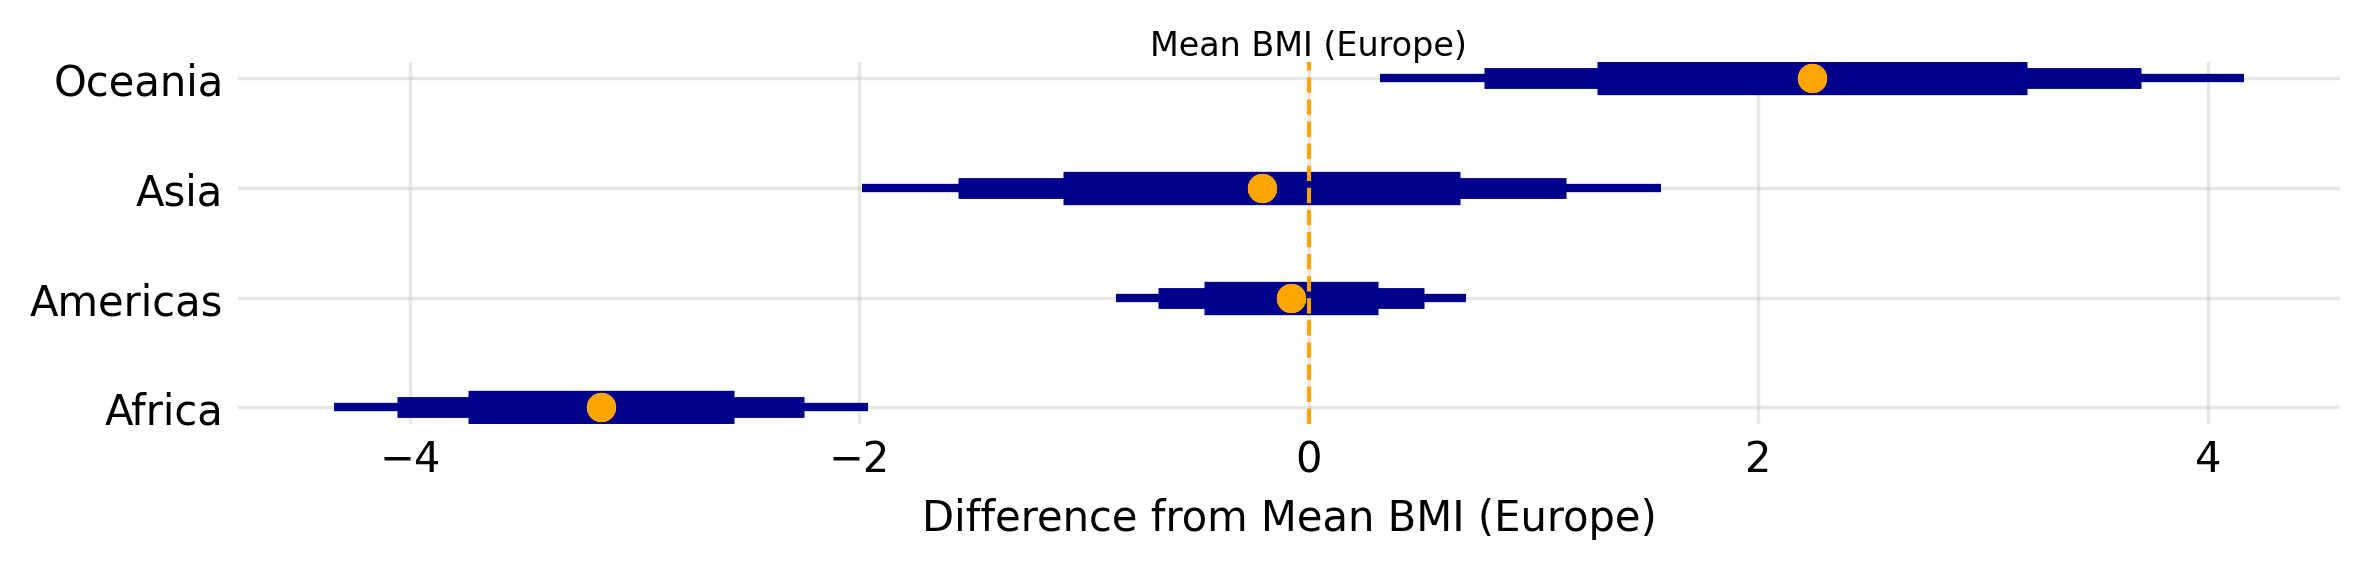

In [83]:
plt.figure(figsize=(8, 2))  # Adjust figure size for better visibility

# Plot error bars using plt.errorbar
for region in differences_df['Region'].unique():
    region_data = differences_df[differences_df['Region'] == region]
    y_position = list(differences_df['Region'].unique()).index(region)  # Get y-position based on region order

    for idx, row in region_data.iterrows():
        if row['Interval'] in line_widths:  # Only plot specified intervals
            # Get the line width based on the interval type
            line_width = line_widths.get(row['Interval'], 1)  # Default to 1 if not found

            # Plot errorbar with caps
            plt.errorbar(x=row['Difference'], y=y_position,
                         xerr=[[row['Difference'] - row['Lower_bound']], [row['Upper_bound'] - row['Difference']]],
                         fmt='o', color='orange', ecolor='darkblue',
                         elinewidth=line_width,
                         zorder=2)

# Add a vertical dashed line for zero (mean BMI of Europe)
plt.axvline(x=0, color='orange', linestyle='--', linewidth=1)

# Add text for 'Mean BMI (Europe)' at the top of the plot
plt.text(x=0, y=plt.ylim()[1],
         s='Mean BMI (Europe)',
         ha='center', va='bottom',
         fontsize=8)

# Styling
plt.xlabel('Difference from Mean BMI (Europe)')
plt.ylabel('')

# Set y-axis ticks and labels based on regions
plt.yticks(range(len(differences_df['Region'].unique())), differences_df['Region'].unique())
plt.grid(True, alpha=0.3)
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()

## <font color="#B0AD89"><strong>  Practice 5.3 ᆢ</strong></font>ᆢ
**Issue: Does the mean of Schooling in Middle Eastern countries are significantly higher/lower than the rest of Asia?**

Pick 10 countries in Asia and Middle East (`Region = "Asia"`) then make a graded error bar for Middle East and Asia. (No need to draw the dashed vertical line)

In [84]:
# Set random seed
np.random.seed(42)

# Sample data from Asia and Middle East
sample_asia_me = (life_expectancy[
    (life_expectancy['Region'].isin(['Middle East', 'Asia'])) &
    (life_expectancy['Year'] == 2000)]
    .groupby('Region')
    .apply(lambda x: x.sample(n=10, replace=True))
    .reset_index(drop=True))

# Calculate statistics by region
intervals_schooling = []
for region in sample_asia_me['Region'].unique():
    region_data = sample_asia_me[sample_asia_me['Region'] == region]
    mean_schooling = region_data['Schooling'].mean()
    se = region_data['Schooling'].std() / np.sqrt(len(region_data))

    stats_dict = {
        'Region': region,
        'Mean': mean_schooling,
        'Standard_error': se,
        'Confidence_interval_80': stats.norm.ppf(0.9) * se,
        'Confidence_interval_95': stats.norm.ppf(0.975) * se,
        'Confidence_interval_99': stats.norm.ppf(0.995) * se
    }
    intervals_schooling.append(stats_dict)

# Create DataFrame and reshape
intervals_schooling = pd.DataFrame(intervals_schooling)
intervals_schooling = pd.melt(intervals_schooling,
                            id_vars=['Region', 'Mean', 'Standard_error'],
                            var_name='Interval',
                            value_name='Value')

# Convert Interval to category
intervals_schooling['Interval'] = intervals_schooling['Interval'].astype('category')

intervals_schooling

/tmp/ipykernel_9223/1912498501.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=10, replace=True))


,Region,Mean,Standard_error,Interval,Value
0,Asia,7.33,0.973659,Confidence_interval_80,1.247794
1,Middle East,6.39,0.510653,Confidence_interval_80,0.654428
2,Asia,7.33,0.973659,Confidence_interval_95,1.908336
3,Middle East,6.39,0.510653,Confidence_interval_95,1.000862
4,Asia,7.33,0.973659,Confidence_interval_99,2.507978
5,Middle East,6.39,0.510653,Confidence_interval_99,1.315355


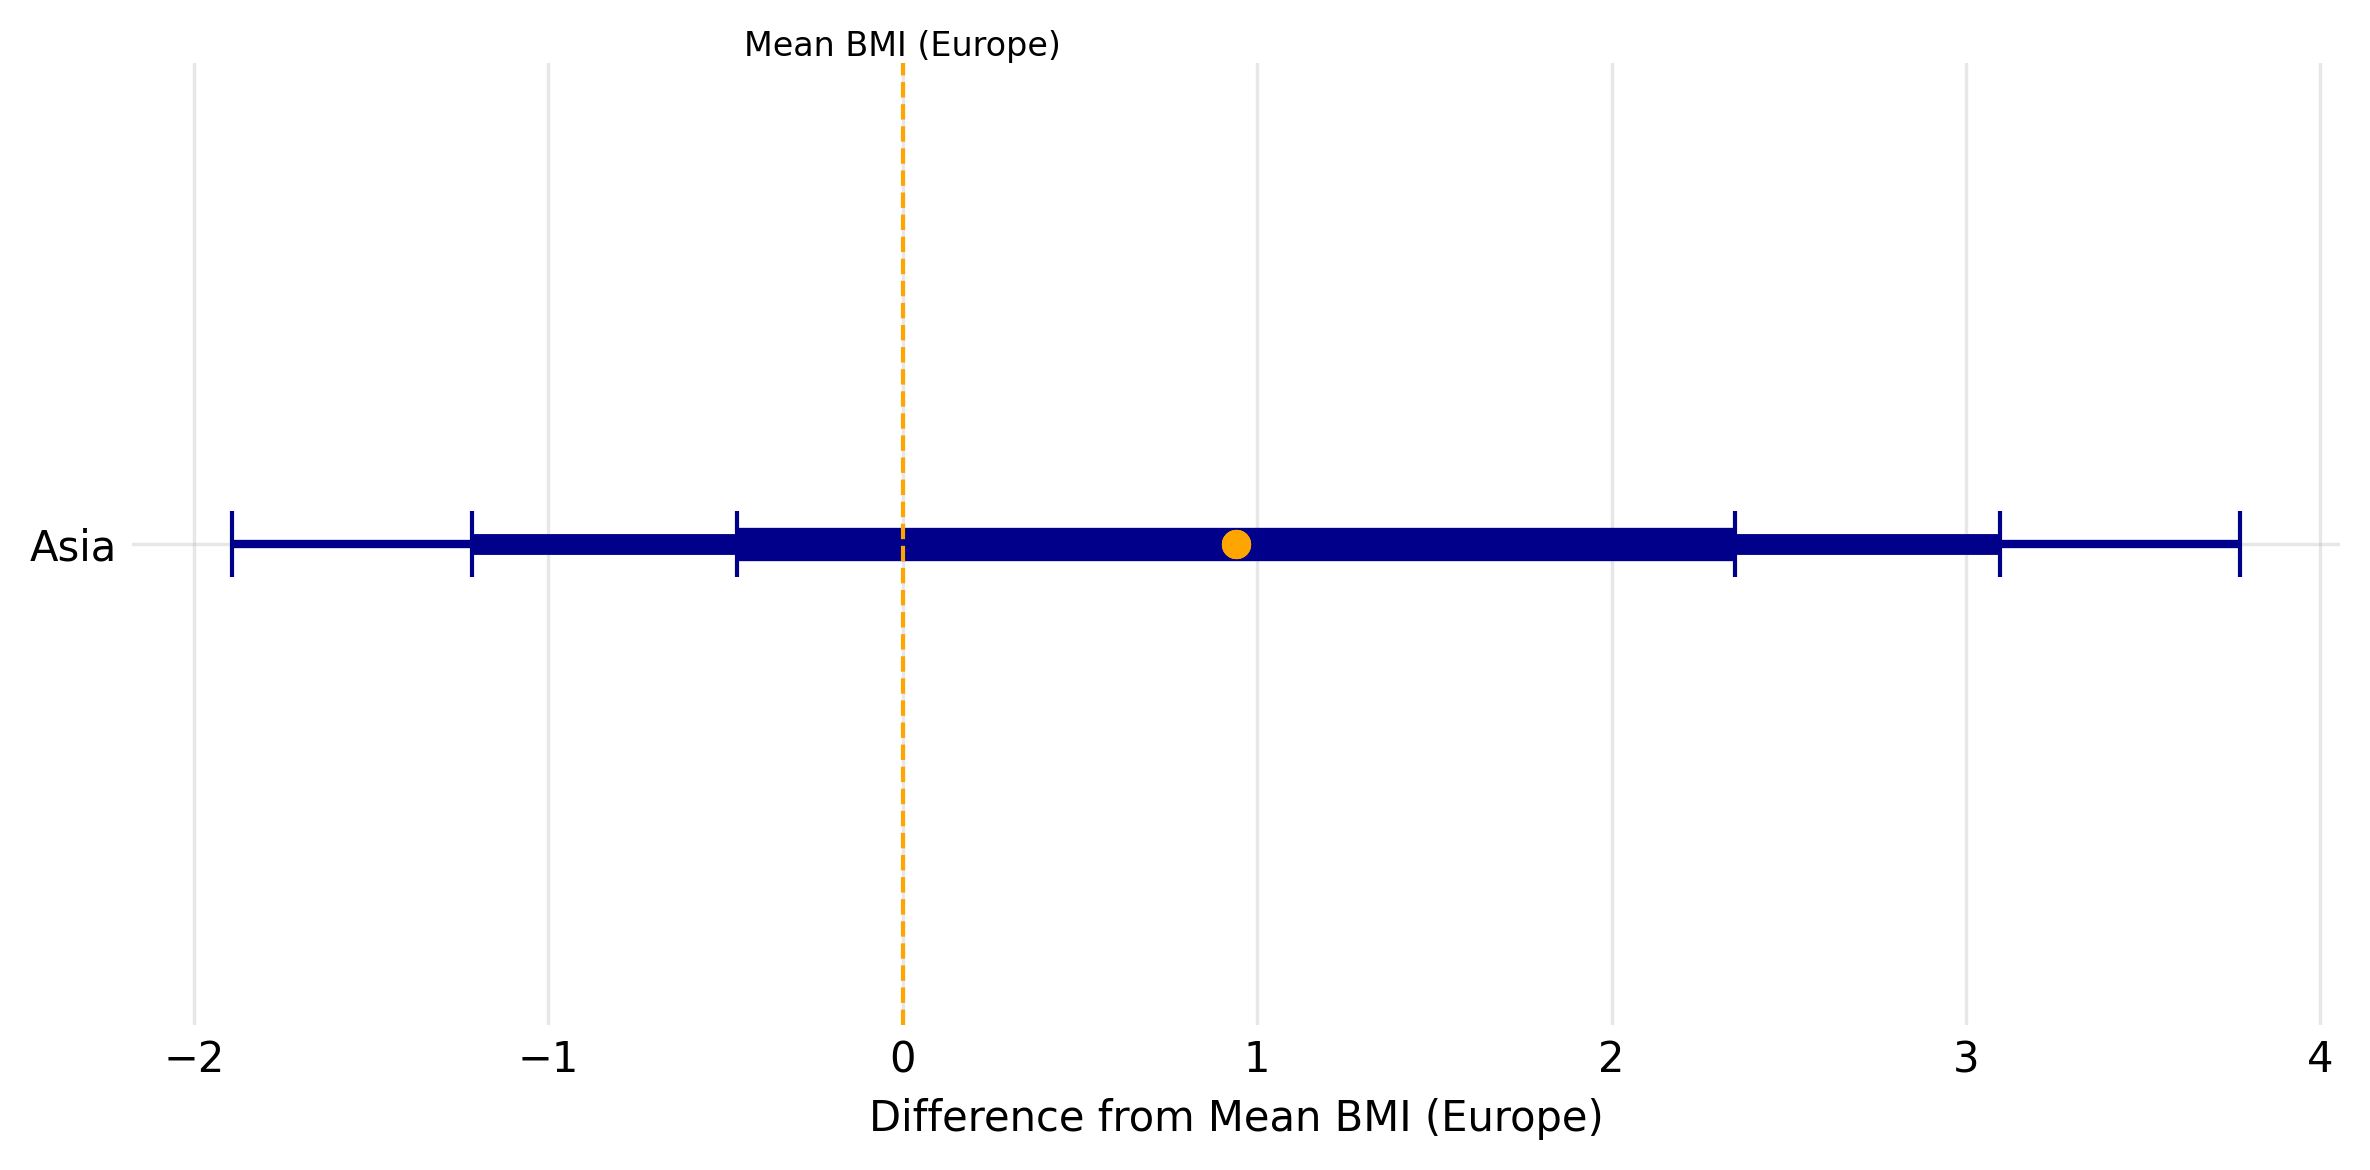

In [87]:
# Calculate the mean BMI of Europe
mean_schooling_me = intervals_schooling[intervals_schooling['Region'] == 'Middle East']['Mean'].iloc[0]

# Function to calculate confidence intervals for differences
def calculate_difference_ci(region_data, confidence_level):
    region_mean = region_data['Mean'].iloc[0]
    region_se = region_data['Standard_error'].iloc[0]
    me_se = intervals_schooling[intervals_schooling['Region'] == 'Middle East']['Standard_error'].iloc[0]

    # Calculate the difference
    difference = region_mean - mean_schooling_me

    # Calculate the standard error of the difference
    se_difference = np.sqrt(region_se**2 + me_se**2)

    # Calculate the critical value from the standard normal distribution
    critical_value = stats.norm.ppf(1 - (1 - confidence_level) / 2)

    # Calculate the margin of error
    margin_of_error = critical_value * se_difference

    # Calculate the confidence interval
    lower_bound = difference - margin_of_error
    upper_bound = difference + margin_of_error

    return difference, lower_bound, upper_bound

# Calculate differences and confidence intervals for each region
differences = []
for region in intervals_schooling['Region'].unique():
    if region != 'Middle East':  # Skip Middle East
        region_data = intervals_schooling[intervals_schooling['Region'] == region]

        # Calculate confidence intervals for 80%, 95%, and 99% levels
        for confidence_level, interval_name in zip([0.8, 0.95, 0.99], ['Confidence_interval_80', 'Confidence_interval_95', 'Confidence_interval_99']):
            difference, lower_bound, upper_bound = calculate_difference_ci(region_data, confidence_level)
            differences.append({
                'Region': region,
                'Interval': interval_name,
                'Difference': difference,
                'Lower_bound': lower_bound,
                'Upper_bound': upper_bound
            })

# Create a DataFrame for the differences
differences_df = pd.DataFrame(differences)

plt.figure(figsize=(8, 4))  # Adjust figure size for better visibility

# Plot error bars using plt.errorbar
for region in differences_df['Region'].unique():
    region_data = differences_df[differences_df['Region'] == region]
    y_position = list(differences_df['Region'].unique()).index(region)  # Get y-position based on region order

    for idx, row in region_data.iterrows():
        if row['Interval'] in line_widths:  # Only plot specified intervals
            # Get the line width based on the interval type
            line_width = line_widths.get(row['Interval'], 1)  # Default to 1 if not found

            # Plot errorbar with caps
            plt.errorbar(x=row['Difference'], y=y_position,
                         xerr=[[row['Difference'] - row['Lower_bound']], [row['Upper_bound'] - row['Difference']]],
                         fmt='o', color='orange', ecolor='darkblue',
                         elinewidth=line_width, capsize=8,
                         zorder=2)

# Add a vertical dashed line for zero (mean BMI of Europe)
plt.axvline(x=0, color='orange', linestyle='--', linewidth=1)

# Add text for 'Mean BMI (Europe)' at the top of the plot
plt.text(x=0, y=plt.ylim()[1],
         s='Mean BMI (Europe)',
         ha='center', va='bottom',
         fontsize=8)

# Styling
plt.xlabel('Difference from Mean BMI (Europe)')
plt.ylabel('')

# Set y-axis ticks and labels based on regions
plt.yticks(range(len(differences_df['Region'].unique())), differences_df['Region'].unique())
plt.grid(True, alpha=0.3)
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()

### > The mean of Schooling in the Middle East is not significantly different from the rest of Asia

## <font color="#B0AD89"><strong>5.4 ⫶ </strong></font>Error bars in Other Plots

<img src="https://i.imgur.com/KOrY0Wn.png" width=1024 />

### <font color="#B0AD89"><strong>a ⬝ </strong></font>Error bars and barplot

<img src="https://i.imgur.com/ThBnVJA.png" width=1024 />

<img src="https://i.imgur.com/xYyUsiW.png" width=1024 />

In [89]:
# Set random seed
np.random.seed(42)

# Sample data from each region
sample_world = (life_expectancy[life_expectancy['Year'] == 2000]
               .groupby('Region')
               .apply(lambda x: x.sample(n=10, replace=True))
               .reset_index(drop=True)
               )

# Replace region name for plotting purposes
sample_world['Region'] = sample_world['Region'].str.replace('Central America and Caribbean', 'Central America\nand Caribbean')

# Calculate statistics by region
intervals_BMI_thin = (sample_world.groupby('Region')
                     .agg({
                         'BMI': ['mean', lambda x: x.std() / np.sqrt(len(x))],
                         'Thinness_five_nine_years': ['mean', lambda x: x.std() / np.sqrt(len(x))]
                     })
                     .reset_index())

# Rename columns
intervals_BMI_thin.columns = ['Region', 'Mean_BMI', 'SE_BMI', 'Mean_Thin', 'SE_Thin']

intervals_BMI_thin

/tmp/ipykernel_9223/2200515380.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=10, replace=True))


,Region,Mean_BMI,SE_BMI,Mean_Thin,SE_Thin
0,Africa,22.34,0.448999,5.32,1.011907
1,Asia,22.95,0.553825,11.02,2.145787
2,Central America\nand Caribbean,24.71,0.341060,3.97,0.480752
3,European Union,25.57,0.213464,1.37,0.264176
4,Middle East,26.43,0.535423,5.37,1.184159
5,North America,26.82,0.158325,1.12,0.213854
6,Oceania,27.24,0.955824,0.90,0.228522
7,Rest of Europe,25.38,0.165865,2.16,0.388215
8,South America,25.12,0.210185,3.25,0.606676


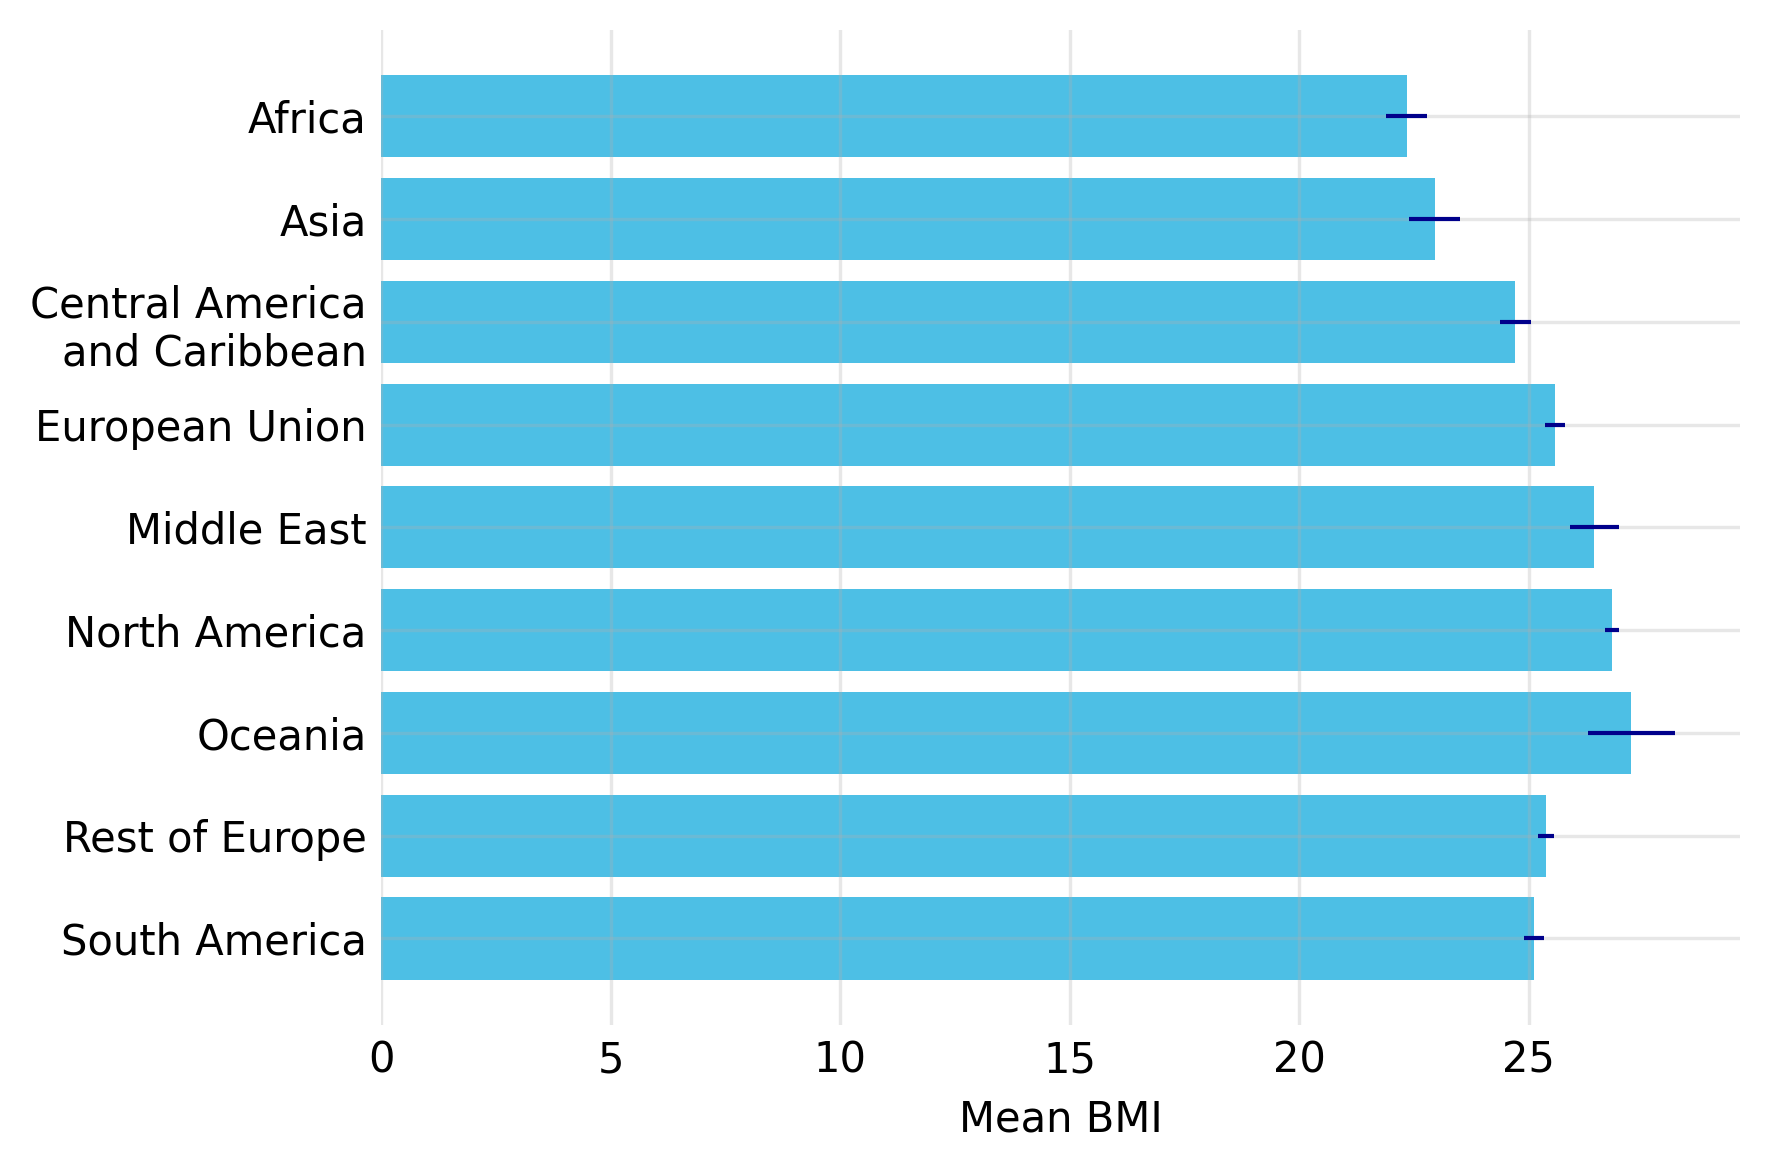

In [94]:
plt.figure(figsize=(6, 4))

# Create horizontal bars with seaborn
sns.barplot(data=intervals_BMI_thin,
           y='Region',
           x='Mean_BMI',
           color='deepskyblue',
           alpha=0.8)

# Add error bars
plt.errorbar(intervals_BMI_thin['Mean_BMI'],
            intervals_BMI_thin['Region'],
            xerr=intervals_BMI_thin['SE_BMI'],
            color='darkblue',
            linewidth=1,
            capsize=0,
            fmt='', linestyle='')  # Only error bars, no markers

# Styling
plt.xlabel('Mean BMI')
plt.ylabel('')
plt.grid(True, alpha=0.3)
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Set x-axis to start at 0
plt.xlim(left=0)

plt.tight_layout()
plt.show()

### <font color="#B0AD89"><strong>b ⬝ </strong></font>Error bars and error bars

<img src="https://i.imgur.com/j5pCbgC.png" width=1024 />

<img src="https://i.imgur.com/78YPFgY.png" width=1024 />


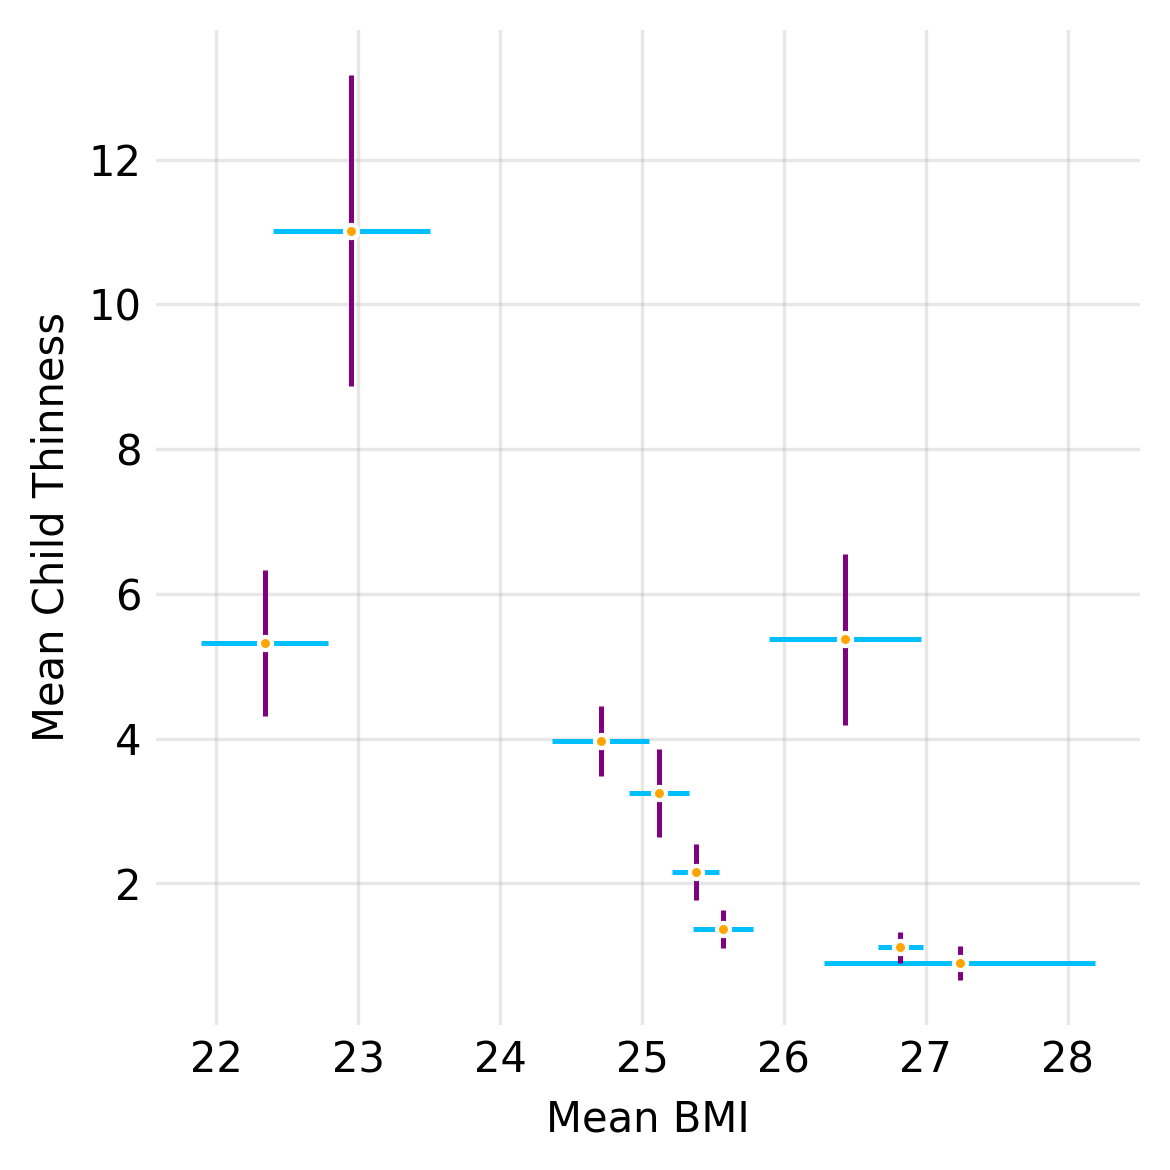

In [96]:
plt.figure(figsize=(4, 4))

# Add horizontal error bars (BMI)
plt.errorbar(intervals_BMI_thin['Mean_BMI'],
            intervals_BMI_thin['Mean_Thin'],
            xerr=intervals_BMI_thin['SE_BMI'],
            color='deepskyblue',
            linewidth=1.2,
            capsize=0,
            fmt='none',
            zorder=2)

# Add vertical error bars (Thinness)
plt.errorbar(intervals_BMI_thin['Mean_BMI'],
            intervals_BMI_thin['Mean_Thin'],
            yerr=intervals_BMI_thin['SE_Thin'],
            color='purple',
            linewidth=1.2,
            capsize=0,
            fmt='none',
            zorder=2)

# Add points
plt.scatter(intervals_BMI_thin['Mean_BMI'],
           intervals_BMI_thin['Mean_Thin'],
           color='orange',
           s=10,
           edgecolor='white',
           zorder=3)#

# Styling
plt.xlabel('Mean BMI')
plt.ylabel('Mean Child Thinness')
plt.grid(True, alpha=0.3)
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()

### <font color="#B0AD89"><strong>c ⬝ </strong></font>Error bars and violin plot

<img src="https://i.imgur.com/XI4VJhz.png" width=1024 />

<img src="https://i.imgur.com/RMzIRDM.png" width=1024 />




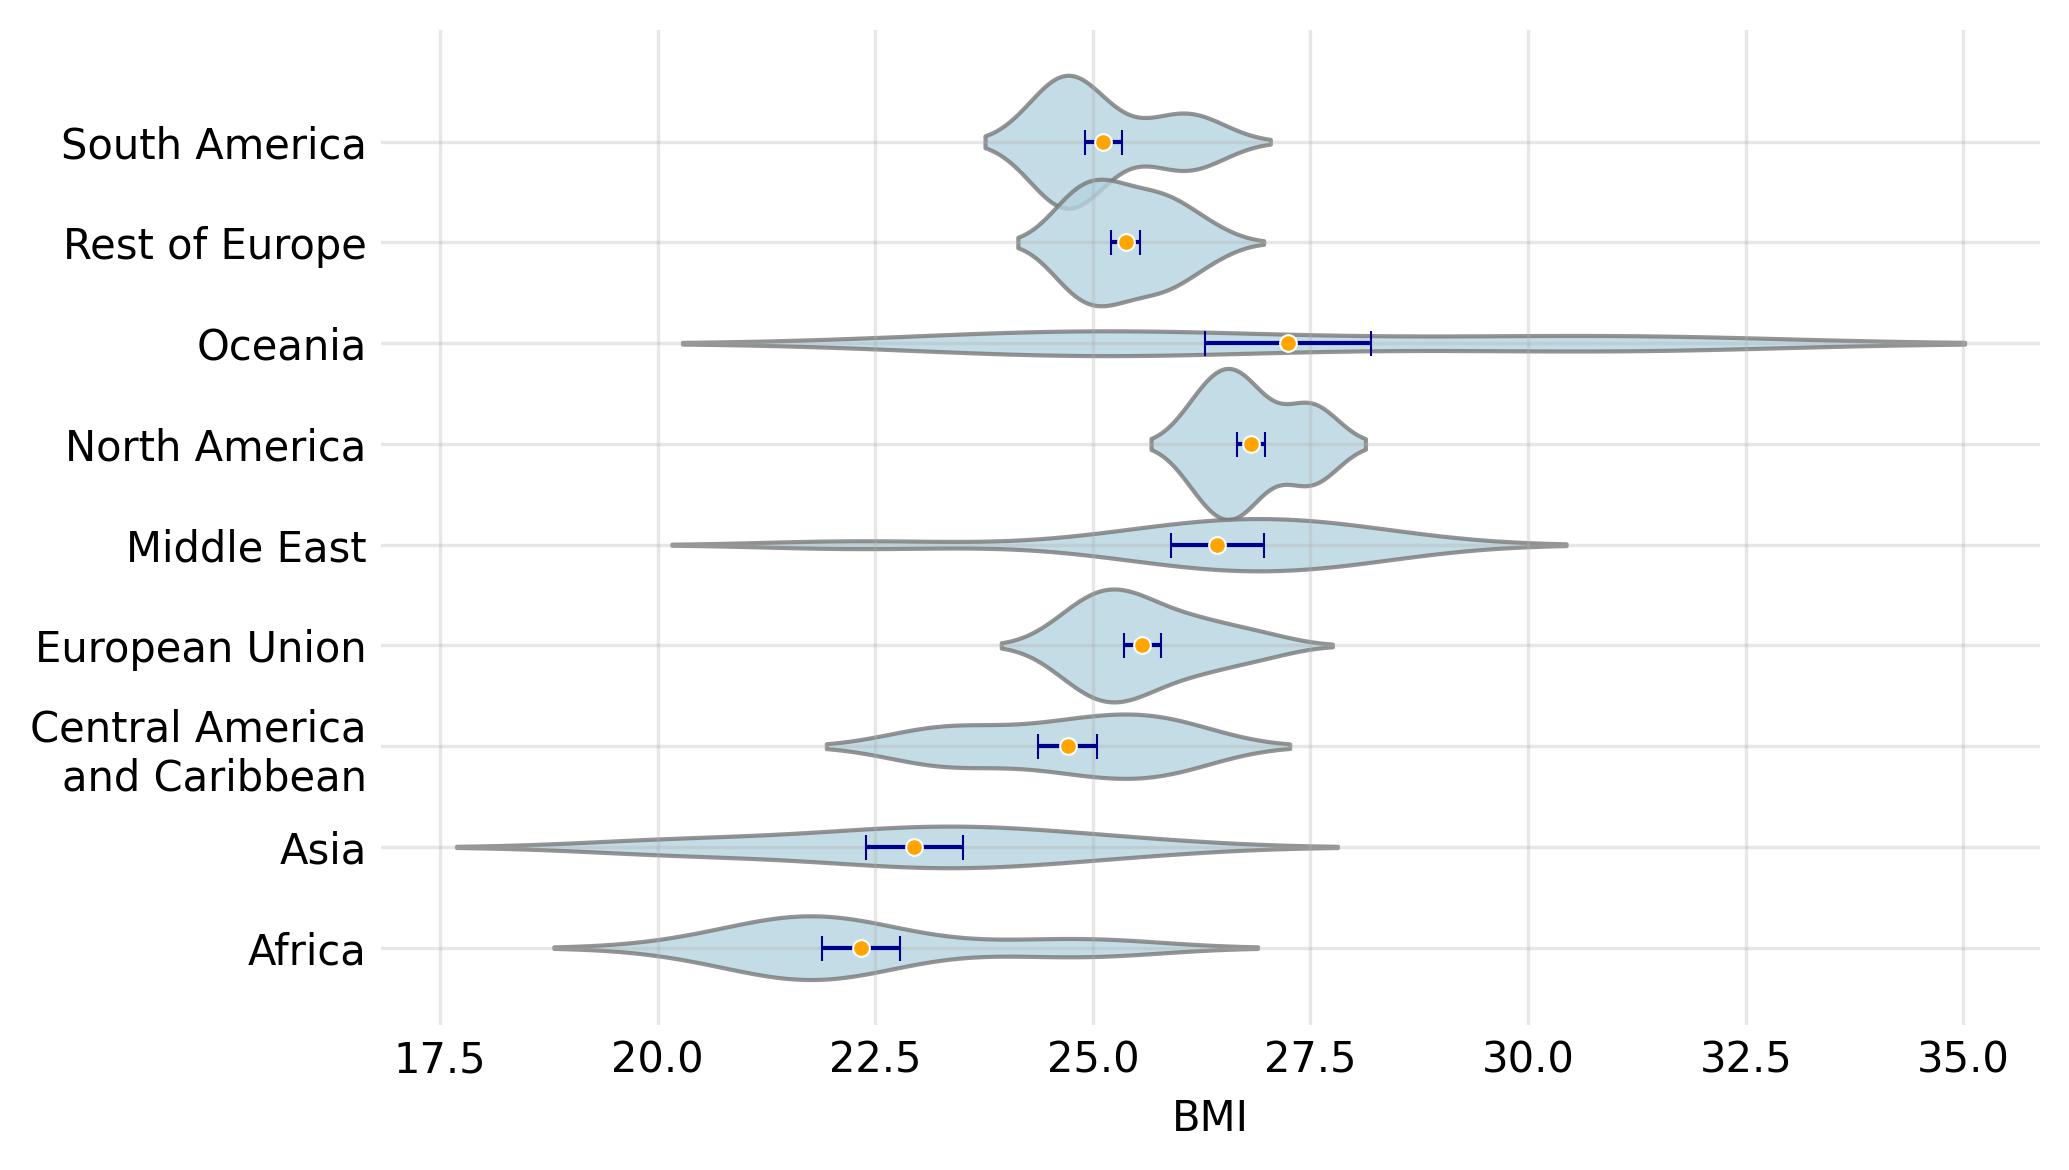

In [97]:
plt.figure(figsize=(7, 4))

# Reverse the order of regions
region_order = sample_world['Region'].unique()[::-1]

# Create violin plot
sns.violinplot(data=sample_world,
               y='Region',
               x='BMI',
               order=region_order,
               color='lightblue',
               alpha=0.8,
               width=1.5,  # Adjust this to control the width of violins
               linewidth=1,
               inner=None)  # Remove the bars inside

# Add error bars
plt.errorbar(intervals_BMI_thin['Mean_BMI'],
            intervals_BMI_thin['Region'],
            xerr=intervals_BMI_thin['SE_BMI'],
            fmt='o',
            color='orange',
            ecolor='darkblue',
            linewidth=1,
            ms=4,
            mec='white',
            mew=0.5,
            capsize=3)


# Styling
plt.xlabel('BMI')
plt.ylabel('')
plt.grid(True, alpha=0.3)
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()

### <font color="#B0AD89"><strong>d ⬝ </strong></font>Error bars and ridgeline plot

<img src="https://i.imgur.com/9fXPpWv.png" width=1024 />


<img src="https://i.imgur.com/DN97A6h.png" width=1024 />




## <font color="#B0AD89"><strong>  Practice 5.4 ᆢ</strong></font>ᆢᆢ
**Issue: What are the means of incident of HIV across the globe using some sample from in each regions?**

Combine error bar with violin plot to visualize the uncertainty and distribution of incident of HIV (`Incidents_HIV`) across regions (sample size for each Region is max 12, "Africa" is being omitted).

In [102]:
# Set random seed
np.random.seed(42)

# Sample data from each region (excluding Africa)
sample_HIV = (life_expectancy[
    (life_expectancy['Year'] == 2000) &
    (life_expectancy['Region'] != 'Africa')]
    .groupby('Region')
    .apply(lambda x: x.sample(n=12, replace=True))
    .reset_index(drop=True))[["Country", "Region", "Incidents_HIV"]]

sample_HIV

/tmp/ipykernel_9223/2965985877.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=12, replace=True))


,Country,Region,Incidents_HIV
0,Indonesia,Asia,0.06
1,Azerbaijan,Asia,0.12
2,Philippines,Asia,0.01
3,Kazakhstan,Asia,0.02
4,Vietnam,Asia,0.25
...,...,...,...
91,"Venezuela, RB",South America,0.40
92,Guyana,South America,0.98
93,Colombia,South America,0.26
94,Argentina,South America,0.16


In [104]:
# Replace region name for plotting purposes
sample_HIV['Region'] = sample_HIV['Region'].str.replace('Central America and Caribbean', 'Central America\nand Caribbean')

# Calculate statistics by region
intervals_HIV = (sample_HIV.groupby('Region')
                     .agg({
                         'Incidents_HIV': ['mean', lambda x: x.std() / np.sqrt(len(x))],
                     })
                     .reset_index())

# Rename columns
intervals_HIV.columns = ['Region', 'Mean_HIV', 'SE_HIV']

intervals_HIV

,Region,Mean_HIV,SE_HIV
0,Asia,0.111667,0.045391
1,Central America\nand Caribbean,0.693333,0.160110
2,European Union,0.085833,0.017253
3,Middle East,0.088333,0.012237
4,North America,0.124167,0.006566
5,Oceania,0.217500,0.058829
6,Rest of Europe,0.057500,0.008972
7,South America,0.375000,0.086309


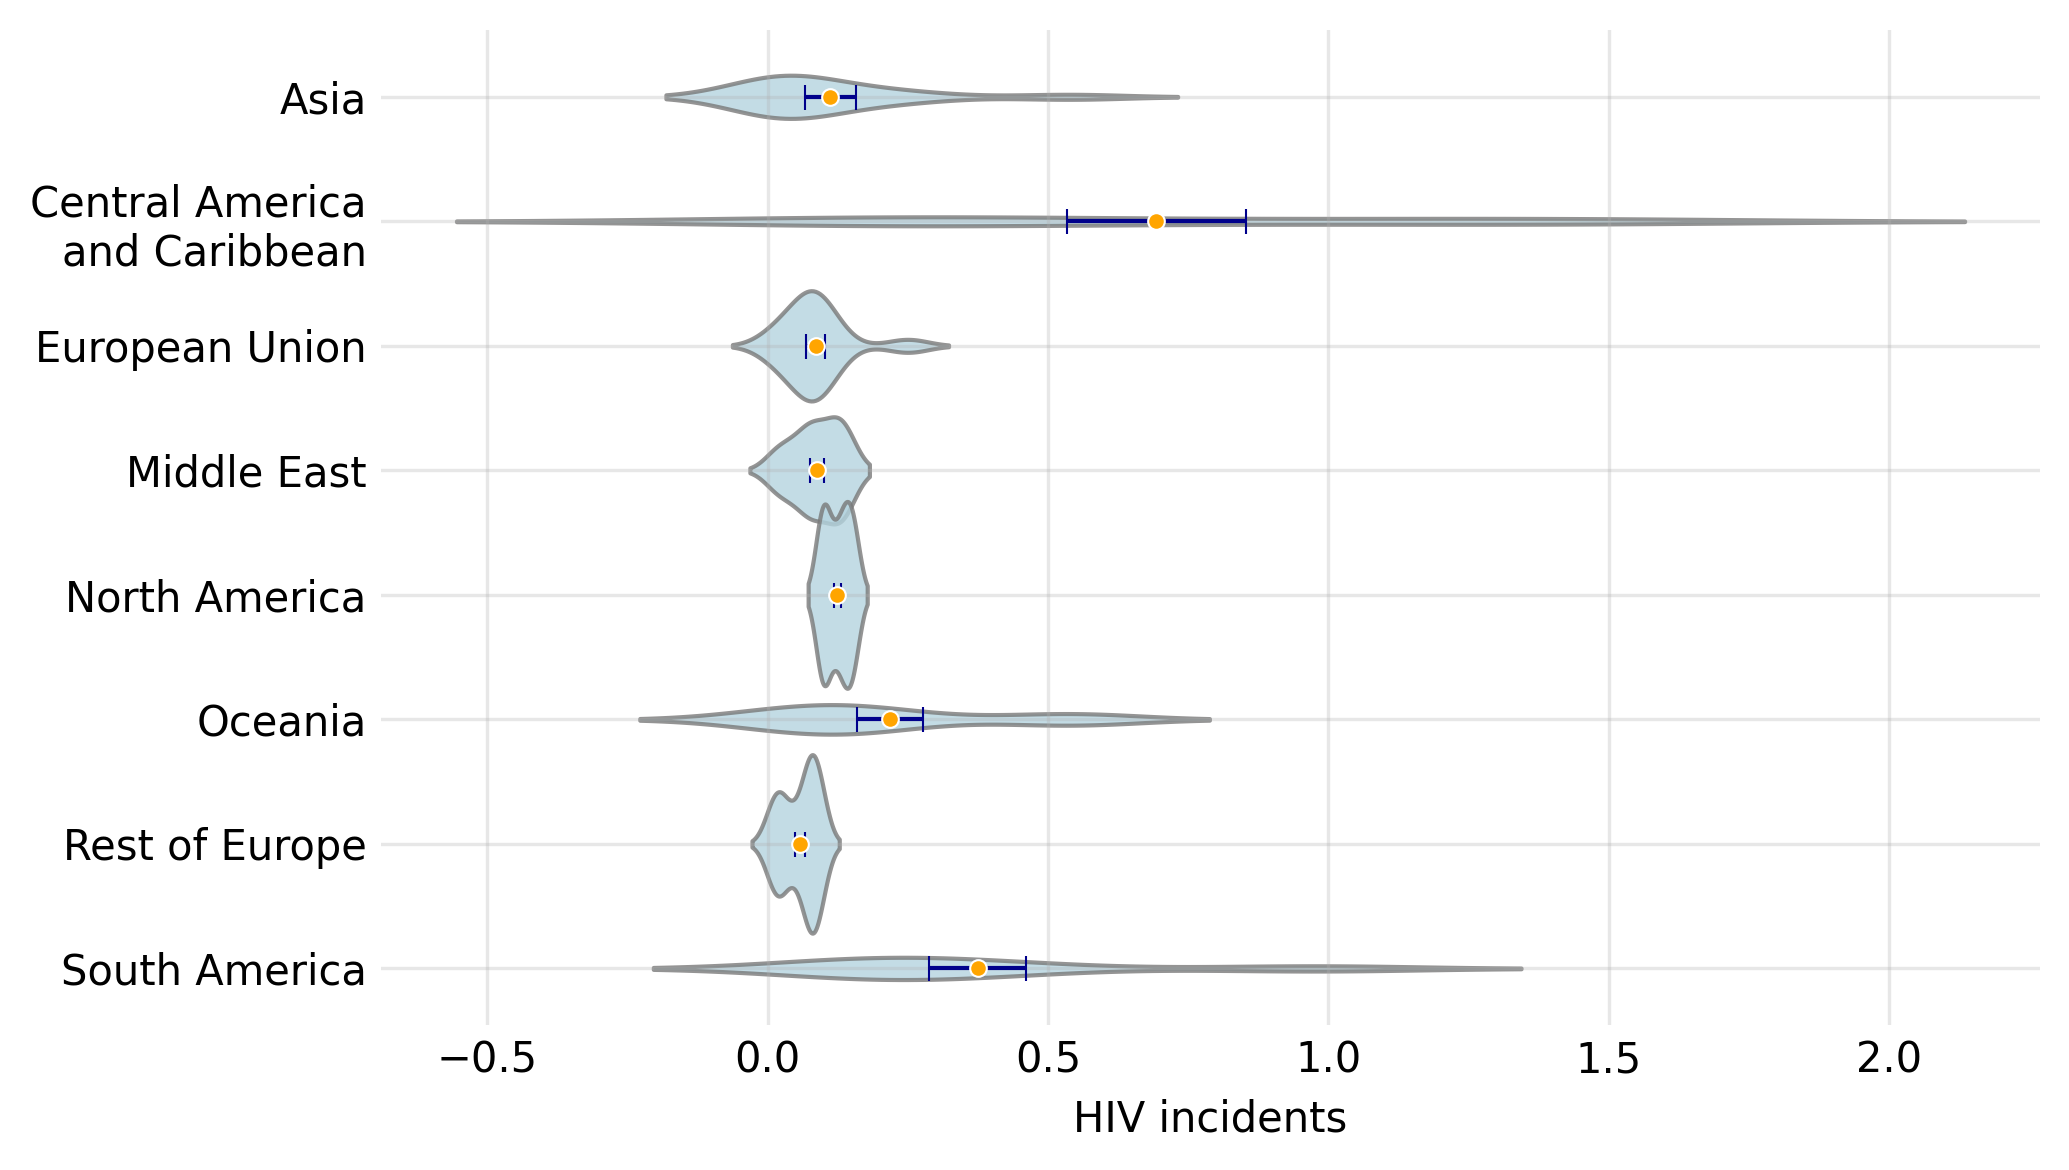

In [106]:
plt.figure(figsize=(7, 4))

# Reverse the order of regions
region_order = sample_HIV['Region'].unique()

# Create violin plot
sns.violinplot(data=sample_HIV,
               y='Region',
               x='Incidents_HIV',
               order=region_order,
               color='lightblue',
               alpha=0.8,
               width=1.5,  # Adjust this to control the width of violins
               linewidth=1,
               inner=None)  # Remove the bars inside

# Add error bars
plt.errorbar(intervals_HIV['Mean_HIV'],
            intervals_HIV['Region'],
            xerr=intervals_HIV['SE_HIV'],
            fmt='o',
            color='orange',
            ecolor='darkblue',
            linewidth=1,
            ms=4,
            mec='white',
            mew=0.5,
            capsize=3)


# Styling
plt.xlabel('HIV incidents')
plt.ylabel('')
plt.grid(True, alpha=0.3)
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()

## <font color="#B0AD89"><strong>5.5 ⫶ </strong></font>Uncertainty of curve fits

<img src="https://i.imgur.com/cXS9tgQ.png" width=1024 />



### <font color="#B0AD89"><strong>a ⬝ </strong></font>Confidence Band

<img src="https://i.imgur.com/Bcz05NX.png" width=1024 />

<img src="https://i.imgur.com/MKFHKwR.png" width=1024 />




In [109]:
# Filter and select European data for 2000
europe_life_thin = (life_expectancy[
    (life_expectancy['Year'] == 2000) &
    (life_expectancy['Region'].isin(['European Union', 'Rest of Europe']))
][['Region', 'Country', 'Life_expectancy',
   'Thinness_five_nine_years', 'Thinness_ten_nineteen_years']])

europe_life_thin.sample(12)

,Region,Country,Life_expectancy,Thinness_five_nine_years,Thinness_ten_nineteen_years
2823,European Union,Czechia,75.0,2.3,2.3
1932,European Union,Portugal,76.3,0.6,0.8
431,European Union,Italy,79.8,0.5,0.5
1488,European Union,Poland,73.7,2.8,2.5
1575,European Union,Austria,78.1,1.9,1.7
1012,Rest of Europe,Montenegro,73.2,2.7,2.6
463,European Union,Estonia,70.4,2.5,2.5
2345,European Union,Denmark,76.6,1.0,1.3
2458,Rest of Europe,United Kingdom,77.7,0.5,0.7
951,Rest of Europe,Ukraine,67.7,3.1,3.0


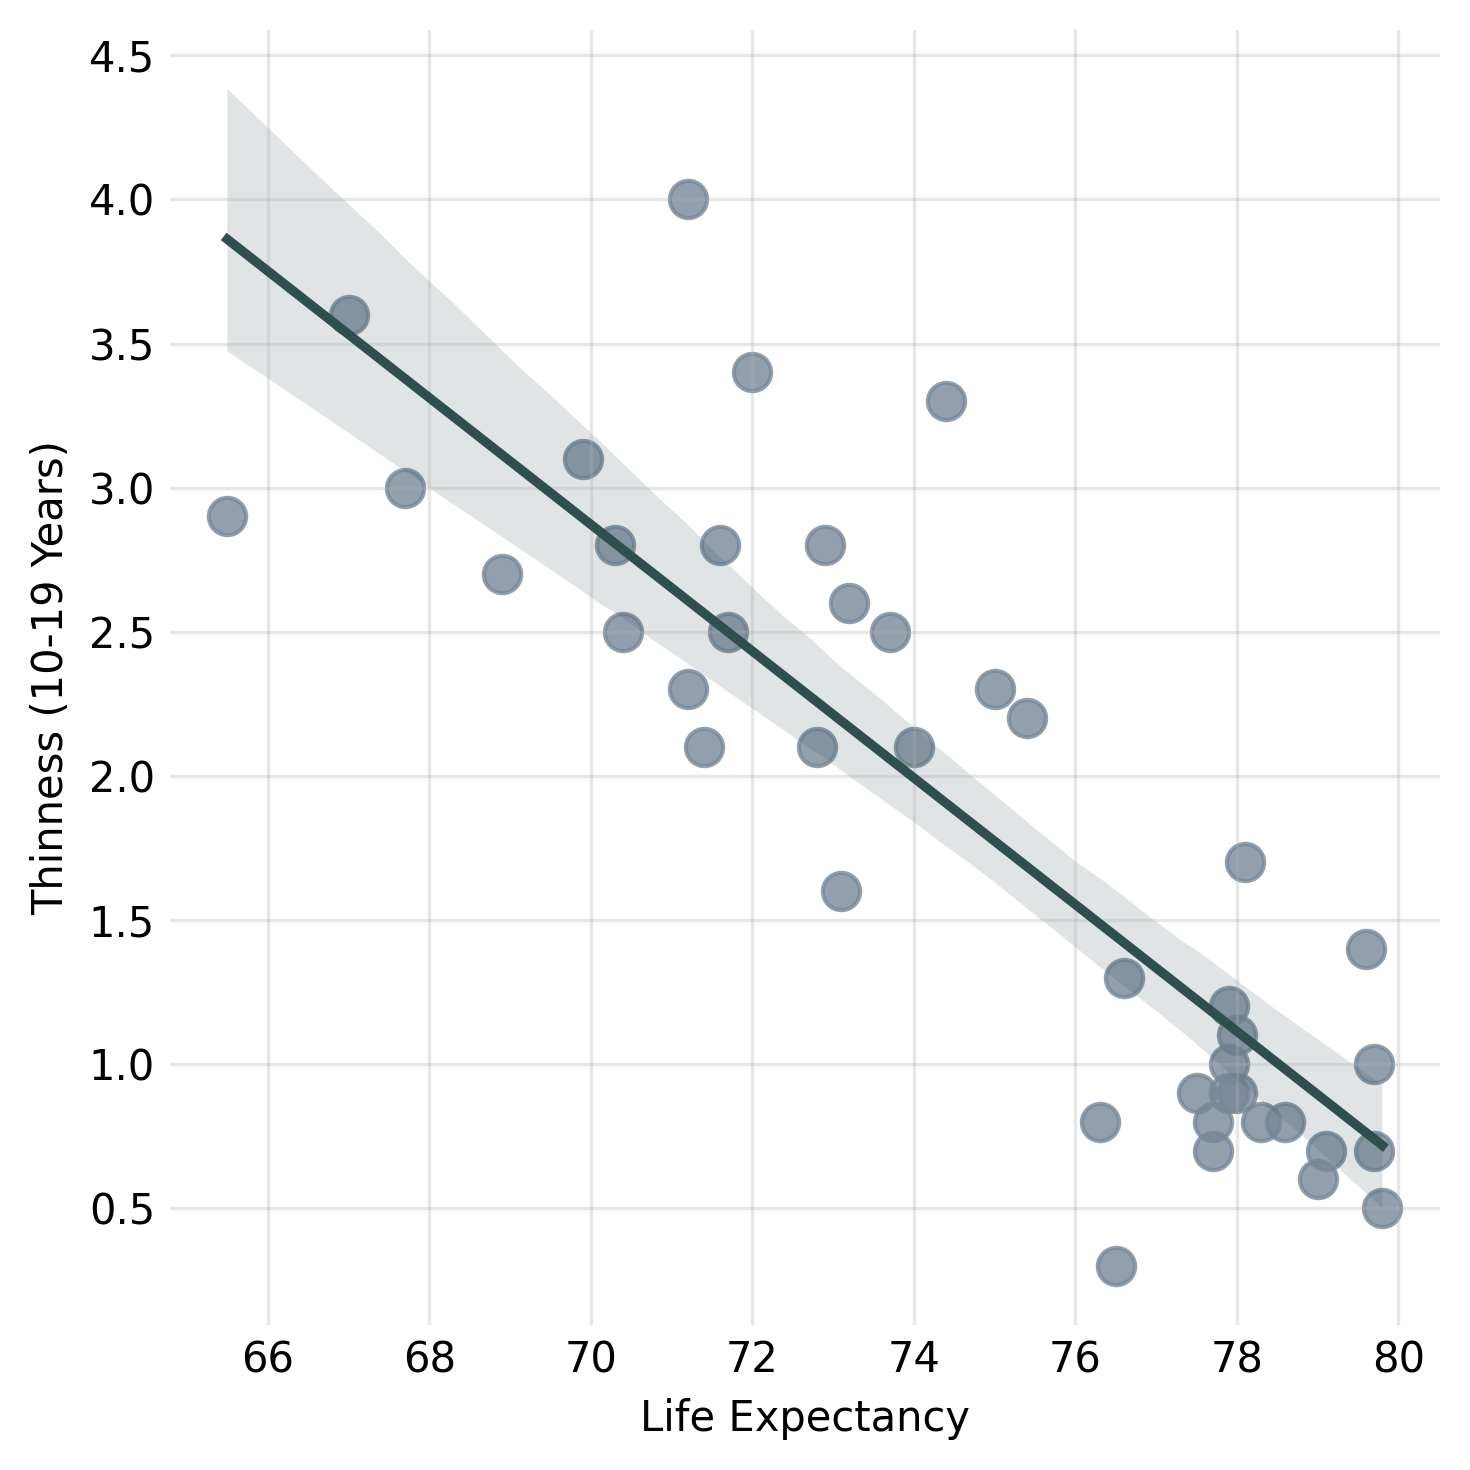

In [110]:
plt.figure(figsize=(5, 5))

# Create scatter plot and regression line with confidence interval
sns.regplot(data=europe_life_thin,
            x='Life_expectancy',
            y='Thinness_ten_nineteen_years',
            scatter_kws={'color': 'lightslategray',
                        's': 80},
            line_kws={'color': 'darkslategray'},
            ci=95,
            color='lightslategray')  # Color for confidence interval

# Styling
plt.xlabel('Life Expectancy')
plt.ylabel('Thinness (10-19 Years)')
plt.grid(True, alpha=0.3)
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()

### <font color="#B0AD89"><strong>b ⬝ </strong></font>Graded Confidence Band

<img src="https://i.imgur.com/BAjXL5H.png" width=1024 />

<img src="https://i.imgur.com/wfc5HDi.png" width=1024 />

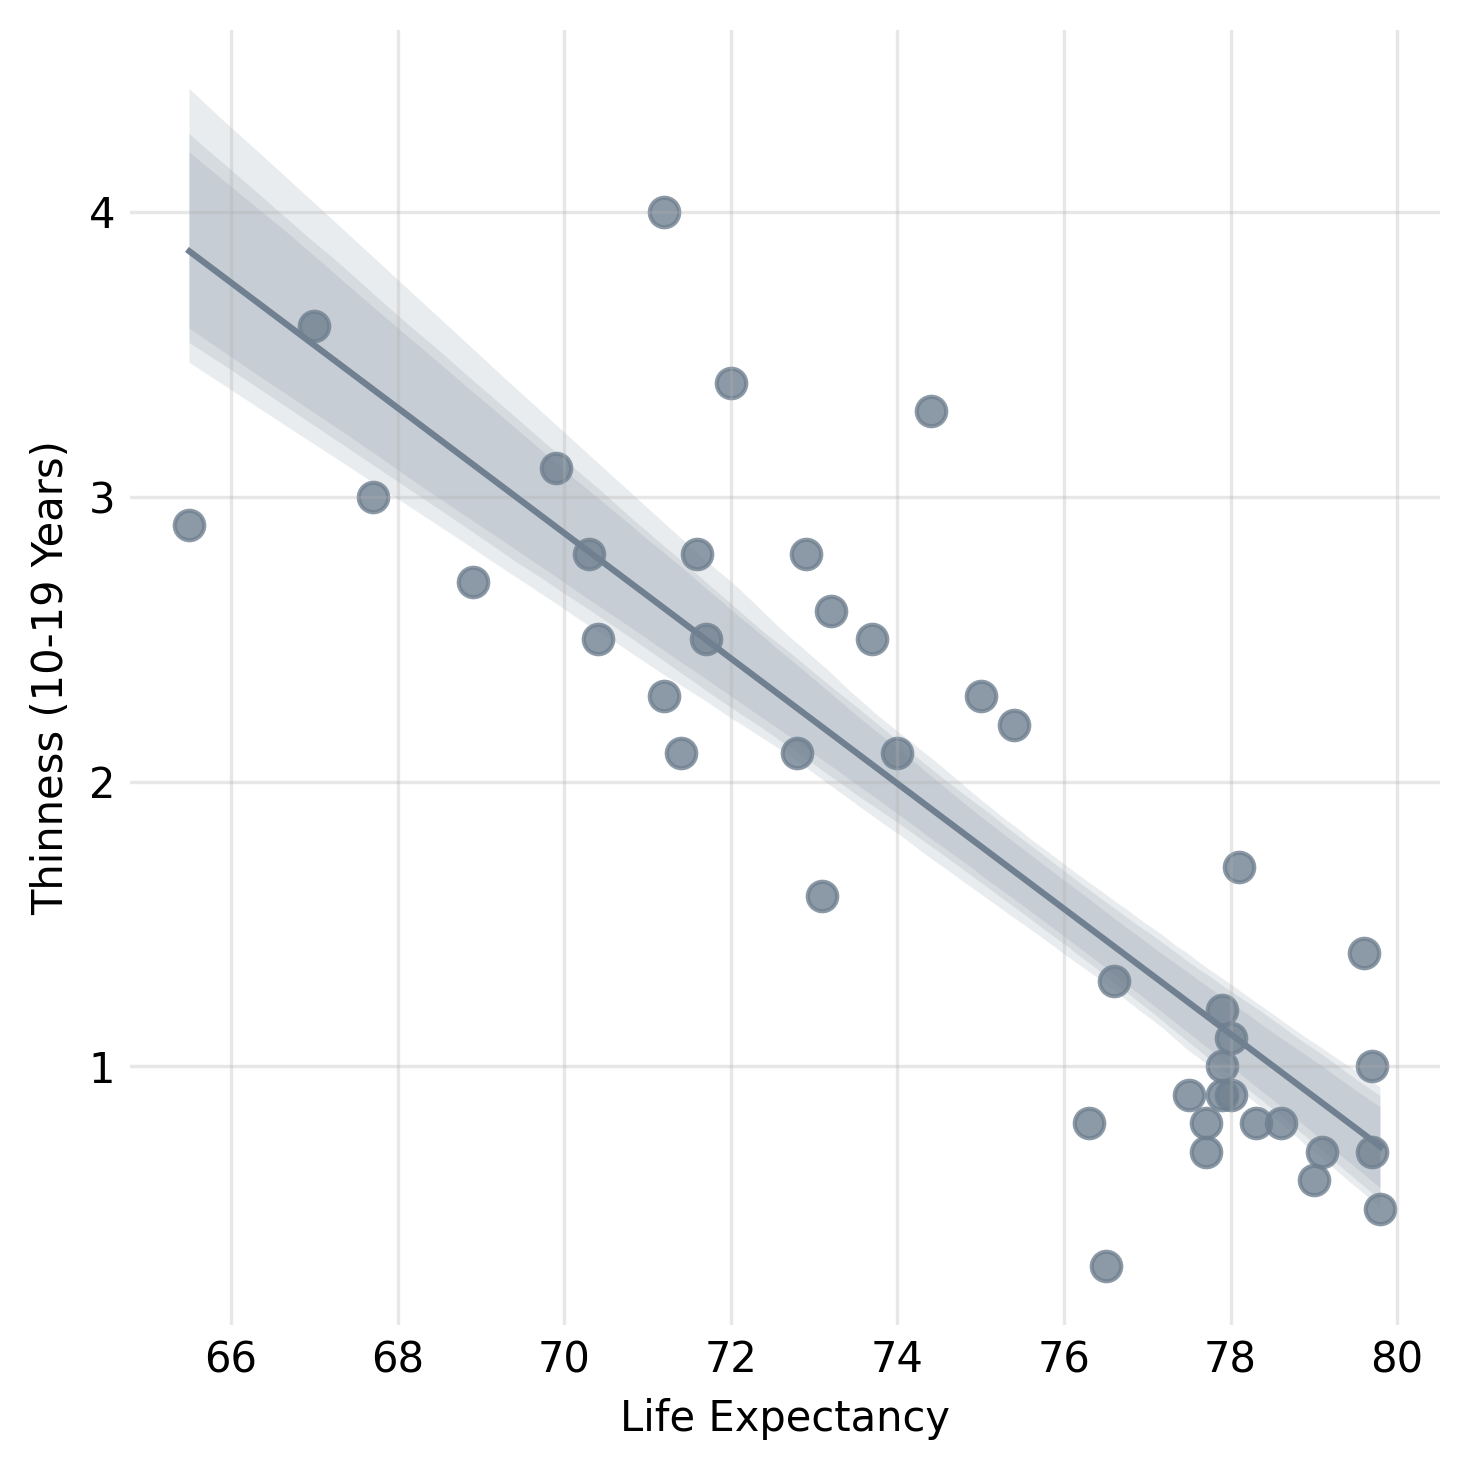

In [111]:
plt.figure(figsize=(5, 5))

# Plot three confidence intervals from widest to narrowest
# 95% CI (lightest)
sns.regplot(data=europe_life_thin,
            x='Life_expectancy',
            y='Thinness_ten_nineteen_years',
            scatter=False,
            ci=95,
            color='slategray',
            line_kws={'color': 'slategray', 'linewidth': 1.5})

# 90% CI (medium)
sns.regplot(data=europe_life_thin,
            x='Life_expectancy',
            y='Thinness_ten_nineteen_years',
            scatter=False,
            ci=90,
            color='slategray',
            line_kws={'alpha': 0})

# 80% CI (darkest)
sns.regplot(data=europe_life_thin,
            x='Life_expectancy',
            y='Thinness_ten_nineteen_years',
            scatter=False,
            ci=80,
            color='slategray',
            line_kws={'alpha': 0})

# Add scatter points last so they're on top
plt.scatter(europe_life_thin['Life_expectancy'],
           europe_life_thin['Thinness_ten_nineteen_years'],
           color='slategray',
           s=50,
           alpha=0.8)

# Styling
plt.xlabel('Life Expectancy')
plt.ylabel('Thinness (10-19 Years)')
plt.grid(True, alpha=0.3)
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()

### <font color="#B0AD89"><strong>c ⬝ </strong></font>Non-linear Confidence Band

<img src="https://i.imgur.com/FySugBv.png" width=1024 />

<img src="https://i.imgur.com/5zodKCO.png" width=1024 />





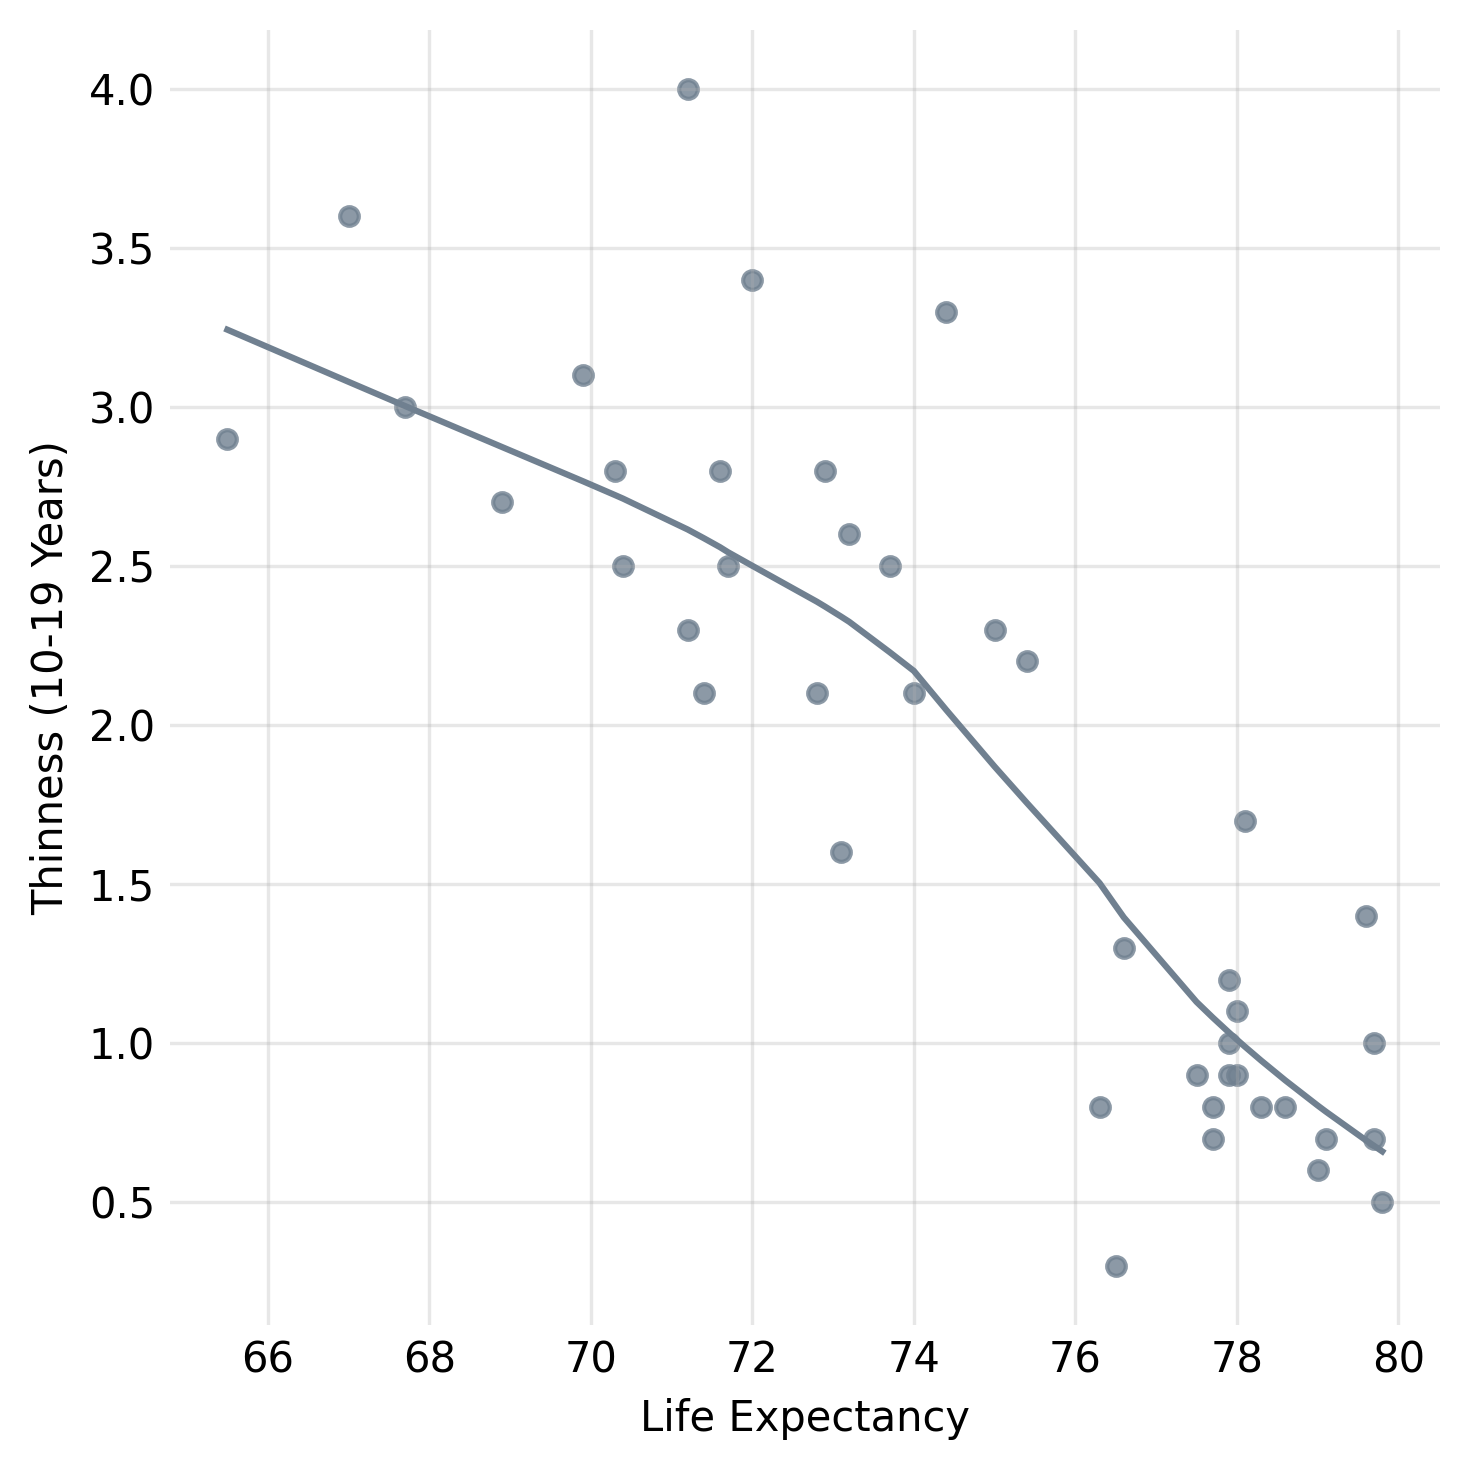

In [114]:
plt.figure(figsize=(5, 5))

# Create scatter plot and LOWESS curve with one line
sns.regplot(data=europe_life_thin,
            x='Life_expectancy',
            y='Thinness_ten_nineteen_years',
            scatter_kws={'color': 'slategray', 's': 20},
            line_kws={'color': 'slategray', 'linewidth': 1.5},
            lowess=True,  # Use LOWESS. Currently, regplot cannot generate the bands
            color='slategray')

# Styling
plt.xlabel('Life Expectancy')
plt.ylabel('Thinness (10-19 Years)')
plt.grid(True, alpha=0.3)
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/Eq2Szvs.png" width=1024 />

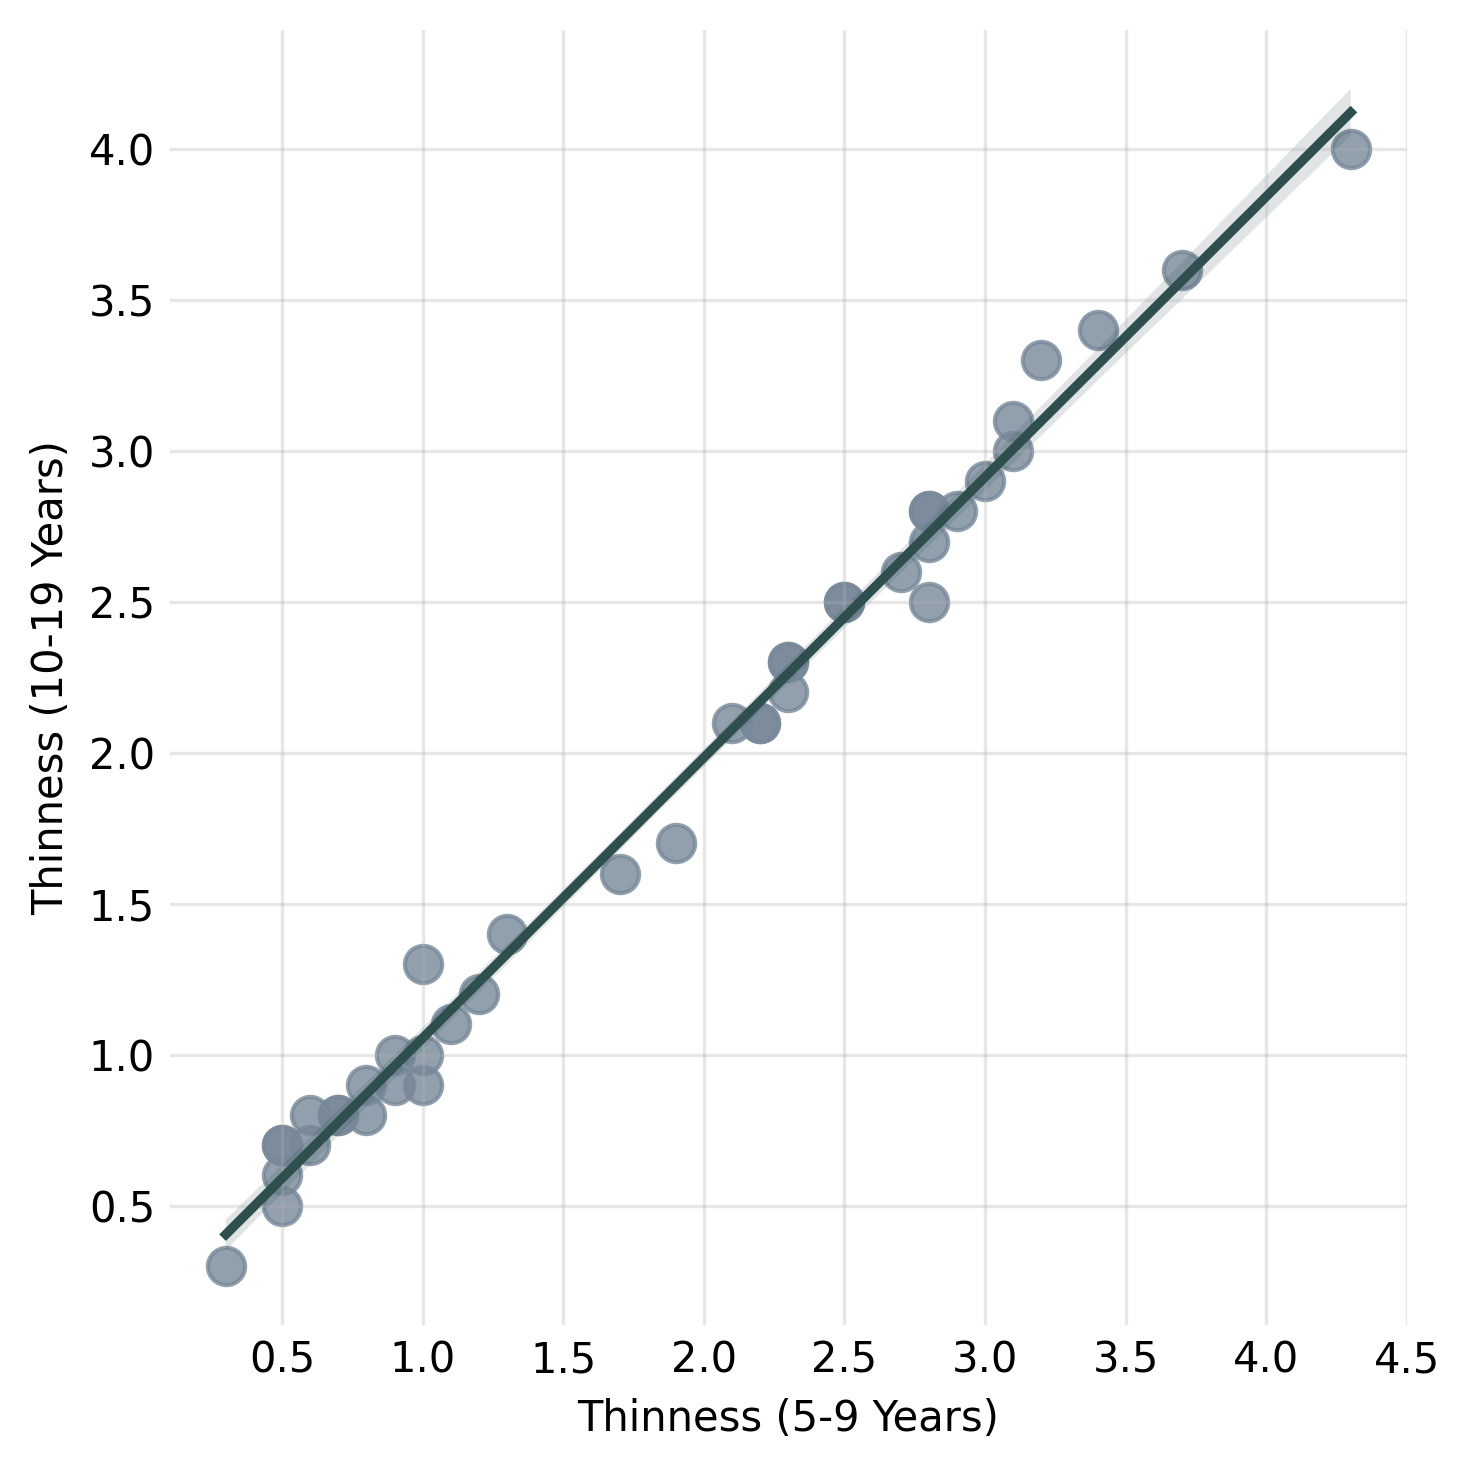

In [115]:
plt.figure(figsize=(5, 5))

# Create scatter plot and regression line with confidence interval
sns.regplot(data=europe_life_thin,
            x='Thinness_five_nine_years',
            y='Thinness_ten_nineteen_years',
            scatter_kws={'color': 'lightslategray',
                        's': 80},  # size equivalent to 2.5 in ggplot
            line_kws={'color': 'darkslategray'},
            ci=95,  # Show 95% confidence interval
            color='lightslategray')  # Color for confidence interval

# Styling
plt.xlabel('Thinness (5-9 Years)')
plt.ylabel('Thinness (10-19 Years)')
plt.grid(True, alpha=0.3)
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()

## <font color="#B0AD89"><strong>  Practice 5.5 ᆢ</strong></font>ᆢᆢ
**Issue: What is the relation between the number of cases of Polio and Hepatitis B in African countries in 2010?**

a. Make a linear model and their confidence level to see the relation between `Polio` and `Hepatitis_B`.

b. Make a loess model.

In [117]:
# Filter and select African data for illness analysis
africa_illness = (life_expectancy[
    (life_expectancy['Year'] == 2010) &
    (life_expectancy['Region'] == 'Africa')
][['Region', 'Country', 'Polio', 'Hepatitis_B']])

africa_illness.sample(12)

,Region,Country,Polio,Hepatitis_B
2592,Africa,Benin,77,76
778,Africa,Guinea,62,64
1195,Africa,Burundi,94,96
934,Africa,Malawi,86,93
2610,Africa,Comoros,82,74
2570,Africa,"Congo, Rep.",72,74
2776,Africa,Algeria,95,95
1966,Africa,Eswatini,89,89
967,Africa,"Gambia, The",97,97
1397,Africa,South Africa,72,71


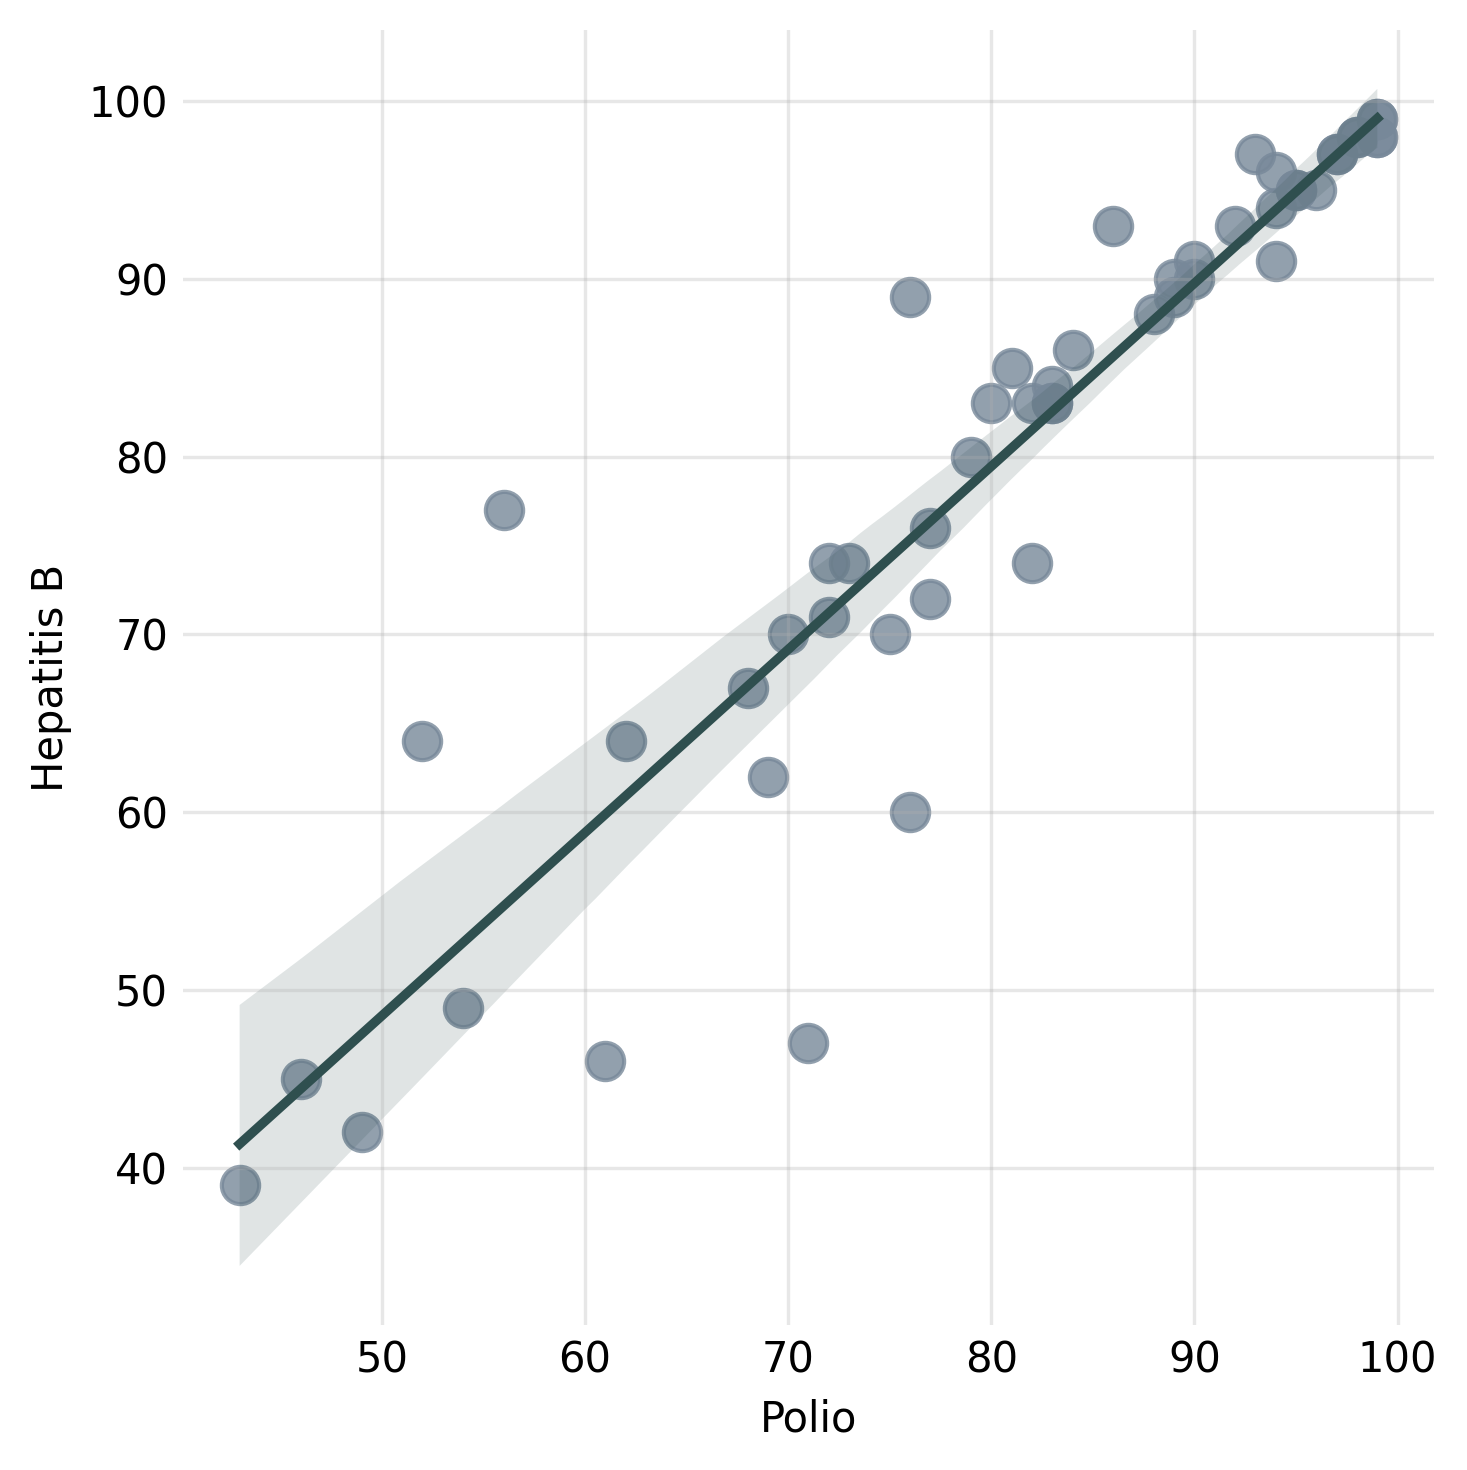

In [118]:
## PLOT : LINEAR MODEL ##

plt.figure(figsize=(5, 5))

# Create scatter plot and regression line with confidence interval
sns.regplot(data=africa_illness,
            x='Polio',
            y='Hepatitis_B',
            scatter_kws={'color': 'lightslategray',
                        's': 80},
            line_kws={'color': 'darkslategray'},
            ci=95,
            color='lightslategray')  # Color for confidence interval

# Styling
plt.xlabel('Polio')
plt.ylabel('Hepatitis B')
plt.grid(True, alpha=0.3)
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()

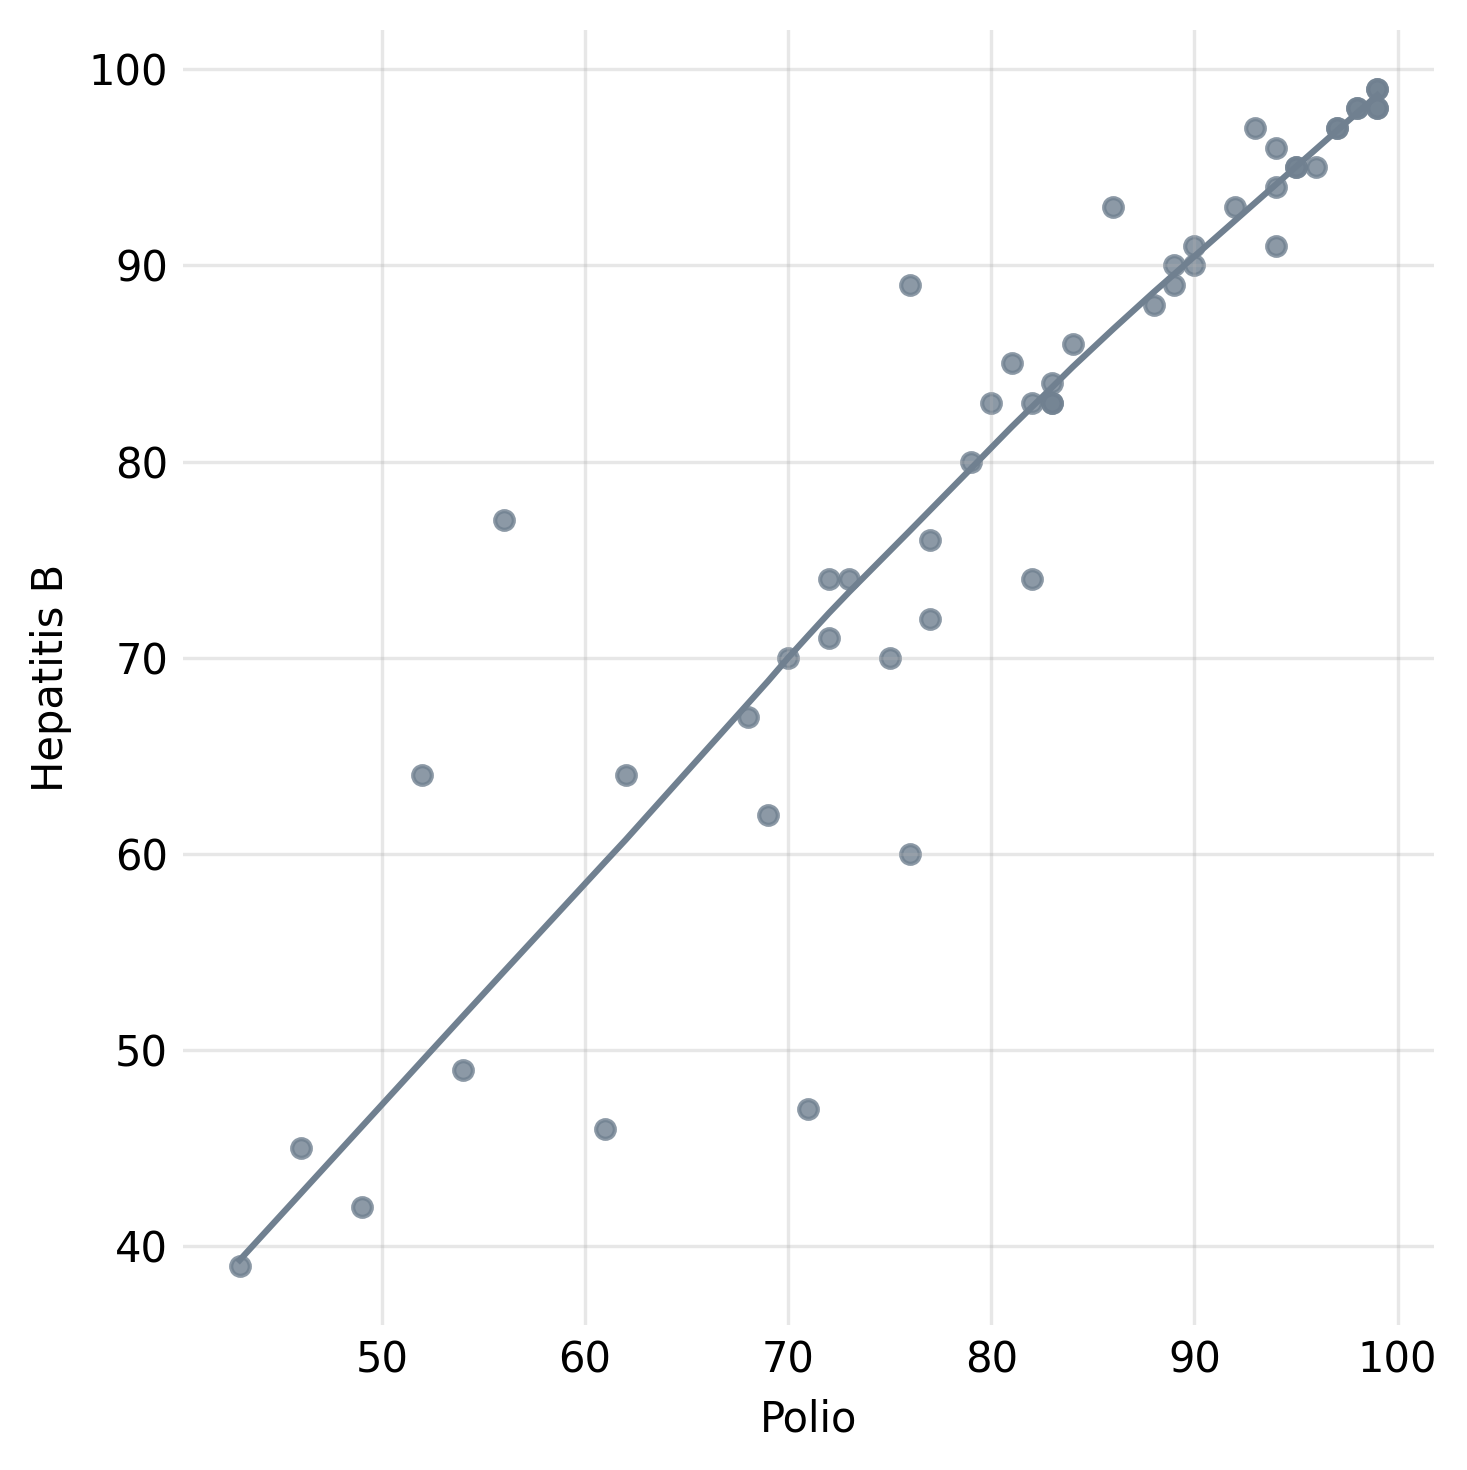

In [119]:
## PLOT : LOESS MODEL ##

plt.figure(figsize=(5, 5))

# Create scatter plot and LOWESS curve with one line
sns.regplot(data=africa_illness,
            x='Polio',
            y='Hepatitis_B',
            scatter_kws={'color': 'slategray', 's': 20},
            line_kws={'color': 'slategray', 'linewidth': 1.5},
            lowess=True,  # Use LOWESS. Currently, regplot cannot generate the bands
            color='slategray')

# Styling
plt.xlabel('Polio')
plt.ylabel('Hepatitis B')
plt.grid(True, alpha=0.3)
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()